In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
np.random.seed(2025)
df = pd.read_csv('data/creditcard.csv').drop(['Time'], axis=1)



In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [102]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
df.describe()

V1            V2            V3            V4            V5  \
count 284807.000000 284807.000000 284807.000000 284807.000000 284807.000000   
mean       0.000000      0.000000     -0.000000      0.000000      0.000000   
std        1.958696      1.651309      1.516255      1.415869      1.380247   
min      -56.407510    -72.715728    -48.325589     -5.683171   -113.743307   
25%       -0.920373     -0.598550     -0.890365     -0.848640     -0.691597   
50%        0.018109      0.065486      0.179846     -0.019847     -0.054336   
75%        1.315642      0.803724      1.027196      0.743341      0.611926   
max        2.454930     22.057729      9.382558     16.875344     34.801666   

                 V6            V7            V8            V9           V10  \
count 284807.000000 284807.000000 284807.000000 284807.000000 284807.000000   
mean       0.000000     -0.000000      0.000000     -0.000000      0.000000   
std        1.332271      1.237094      1.194353      1.098632      1.088850   
min      -26.160506    -43.557242    -73.216718    -13.434066    -24.588262   
25%       -0.768296     -0.554076     -0.208630     -0.643098     -0.535426   
50%       -0.274187      0.040103      0.022358     -0.051429     -0.092917   
75%        0.398565      0.570436      0.327346      0.597139      0.453923   
max       73.301626    120.589494     20.007208     15.594995     23.745136   

       ...           V21           V22           V23           V24  \
count  ... 284807.000000 284807.000000 284807.000000 284807.000000   
mean   ...      0.000000     -0.000000      0.000000      0.000000   
std    ...      0.734524      0.725702      0.624460      0.605647   
min    ...    -34.830382    -10.933144    -44.807735     -2.836627   
25%    ...     -0.228395     -0.542350     -0.161846     -0.354586   
50%    ...     -0.029450      0.006782     -0.011193      0.040976   
75%    ...      0.186377      0.528554      0.147642      0.439527   
max    ...     27.202839     10.503090     22.528412      4.584549   

                V25           V26           V27           V28        Amount  \
count 284807.000000 284807.000000 284807.000000 284807.000000 284807.000000   
mean       0.000000      0.000000     -0.000000     -0.000000     88.349619   
std        0.521278      0.482227      0.403632      0.330083    250.120109   
min      -10.295397     -2.604551    -22.565679    -15.430084      0.000000   
25%       -0.317145     -0.326984     -0.070840     -0.052960      5.600000   
50%        0.016594     -0.052139      0.001342      0.011244     22.000000   
75%        0.350716      0.240952      0.091045      0.078280     77.165000   
max        7.519589      3.517346     31.612198     33.847808  25691.160000   

              Class  
count 284807.000000  
mean       0.001727  
std        0.041527  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 30 columns]

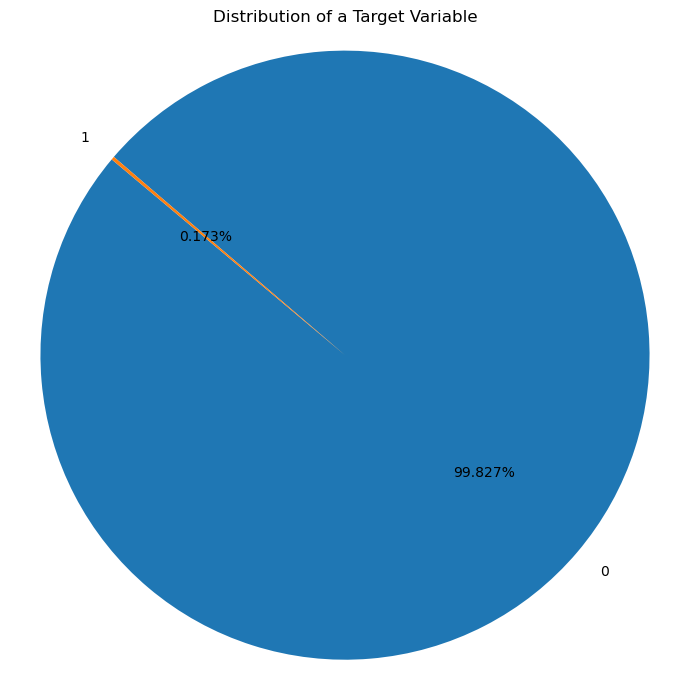

In [103]:
counts = df.Class.value_counts()


plt.figure(figsize=(7, 7))
plt.pie(counts, labels=counts.index, autopct='%1.3f%%', 
        startangle=140)

plt.title('Distribution of a Target Variable')
plt.axis('equal')  

plt.tight_layout()
plt.show()

In [104]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Class'])
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=df.columns.drop(['Class']), index=df.index)
y = df['Class']
print(X.describe())

                 V1            V2            V3            V4            V5  \
count 284807.000000 284807.000000 284807.000000 284807.000000 284807.000000   
mean      -0.000000     -0.000000     -0.000000     -0.000000      0.000000   
std        1.000002      1.000002      1.000002      1.000002      1.000002   
min      -28.798555    -44.035292    -31.871733     -4.013919    -82.408097   
25%       -0.469892     -0.362471     -0.587214     -0.599379     -0.501069   
50%        0.009245      0.039657      0.118612     -0.014017     -0.039367   
75%        0.671694      0.486720      0.677457      0.525008      0.443346   
max        1.253351     13.357750      6.187993     11.918743     25.214135   

                 V6            V7            V8            V9           V10  \
count 284807.000000 284807.000000 284807.000000 284807.000000 284807.000000   
mean       0.000000      0.000000     -0.000000      0.000000      0.000000   
std        1.000002      1.000002      1.000002    

   feature  importance
0      V14    0.216357
1      V10    0.159023
2       V4    0.101080
3      V12    0.081361
4      V17    0.068696
5      V16    0.055276
6      V11    0.045103
7       V7    0.036367
8       V3    0.030584
9       V2    0.021401
10      V9    0.020756
11      V5    0.016147
12     V18    0.015769
13      V8    0.015437
14     V21    0.013940
15     V19    0.013569
16  Amount    0.010381
17      V1    0.009488
18     V26    0.007779
19     V13    0.007568
20     V20    0.007247
21      V6    0.007191
22     V22    0.005947
23     V23    0.005846
24     V28    0.005738
25     V27    0.005688
26     V15    0.005687
27     V25    0.005394
28     V24    0.005182


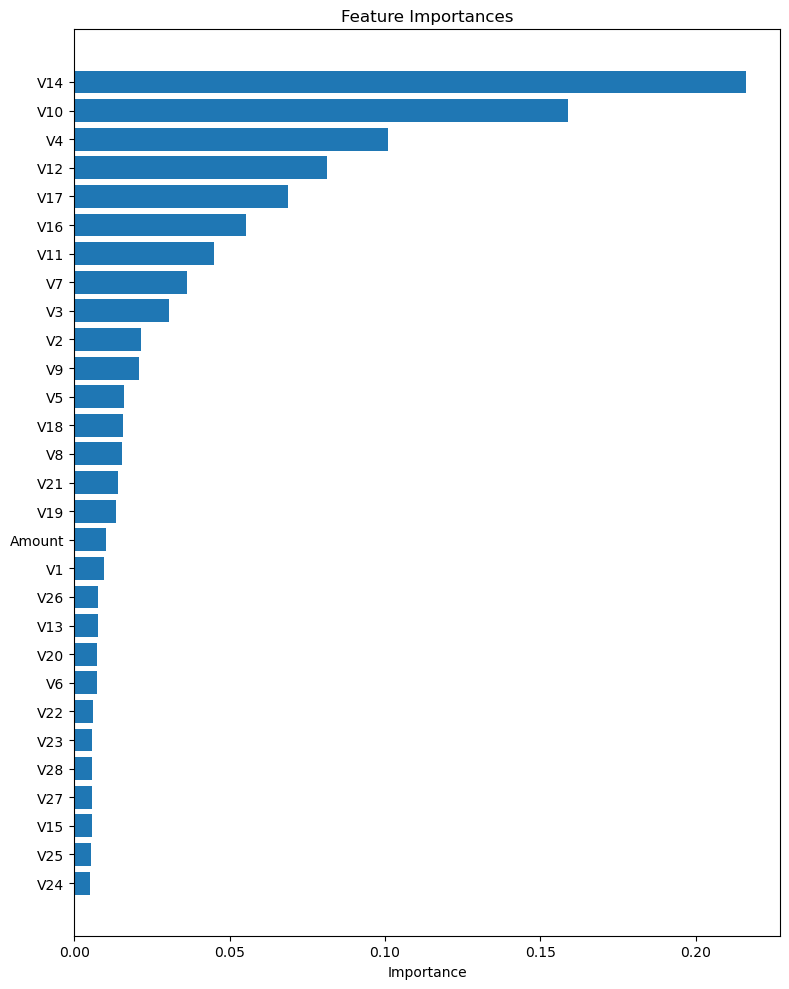

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
)

clf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    class_weight='balanced'
)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

print(feat_imp)

plt.figure(figsize=(8, 10))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [106]:
top_6 = feat_imp.feature[:6]
X = df[top_6].copy()
print( X.info(),"\n")
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V14     284807 non-null  float64
 1   V10     284807 non-null  float64
 2   V4      284807 non-null  float64
 3   V12     284807 non-null  float64
 4   V17     284807 non-null  float64
 5   V16     284807 non-null  float64
dtypes: float64(6)
memory usage: 13.0 MB
None 

<class 'pandas.core.series.Series'>
RangeIndex: 284807 entries, 0 to 284806
Series name: Class
Non-Null Count   Dtype
--------------   -----
284807 non-null  int64
dtypes: int64(1)
memory usage: 2.2 MB


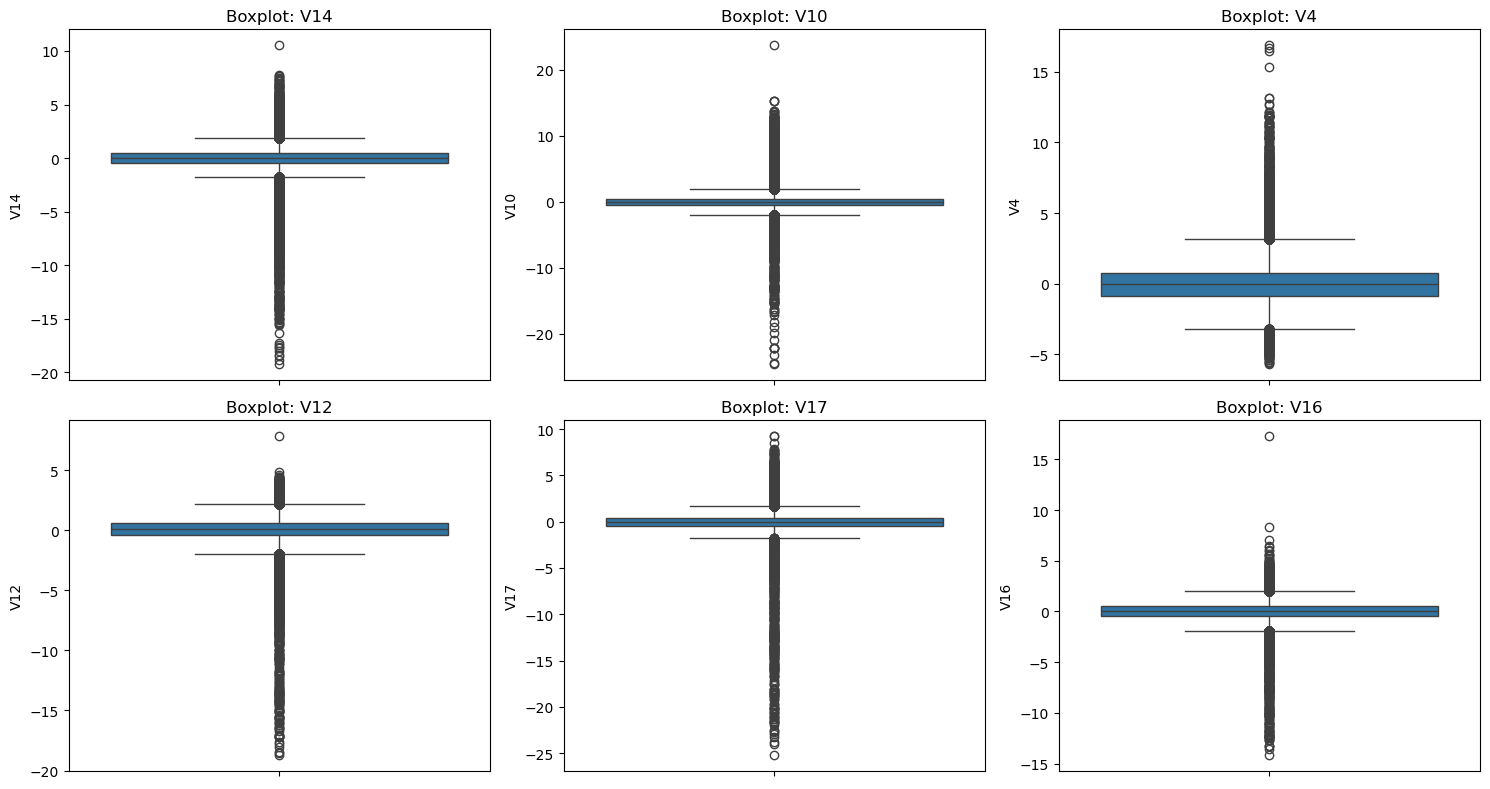

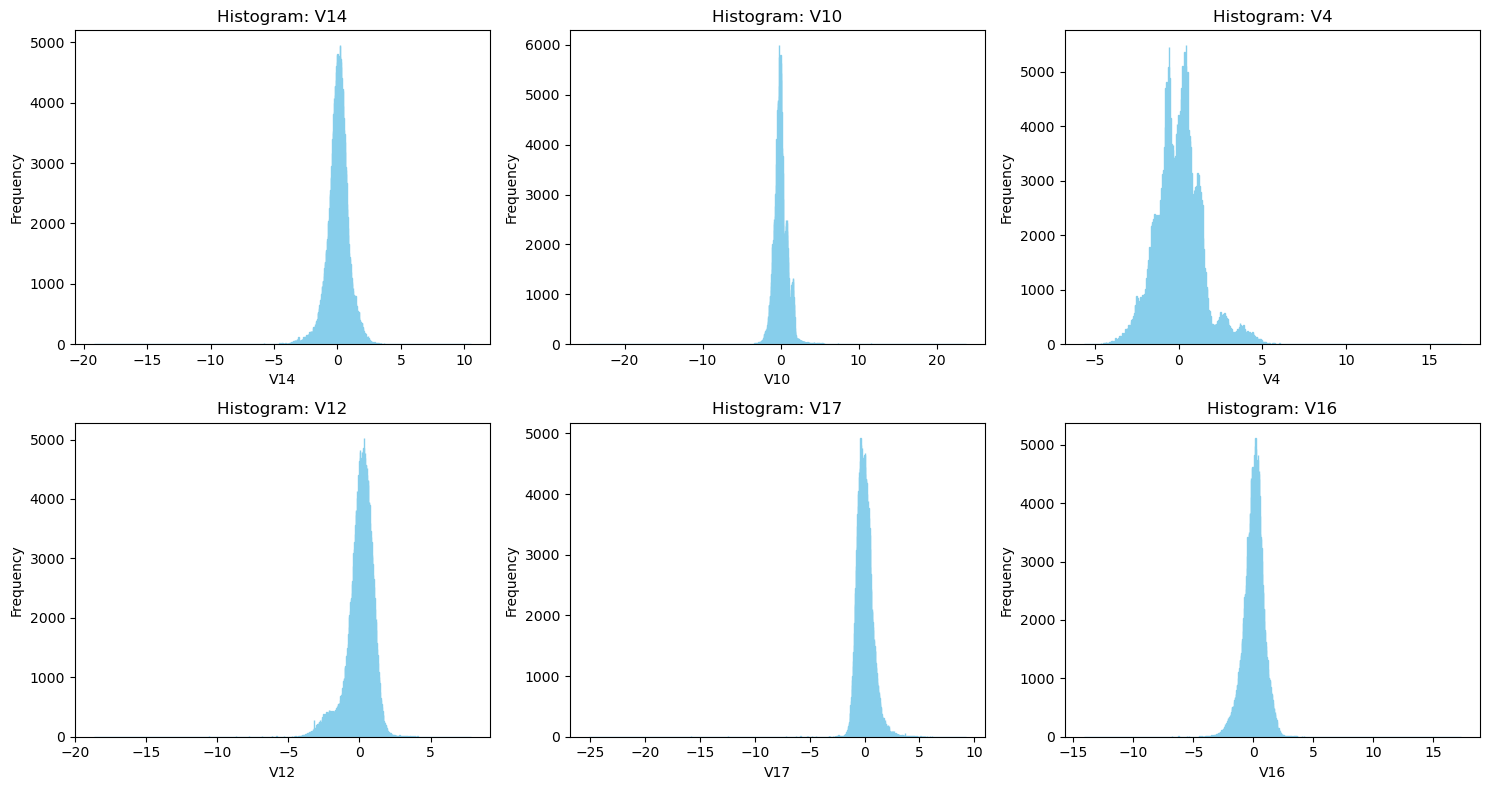

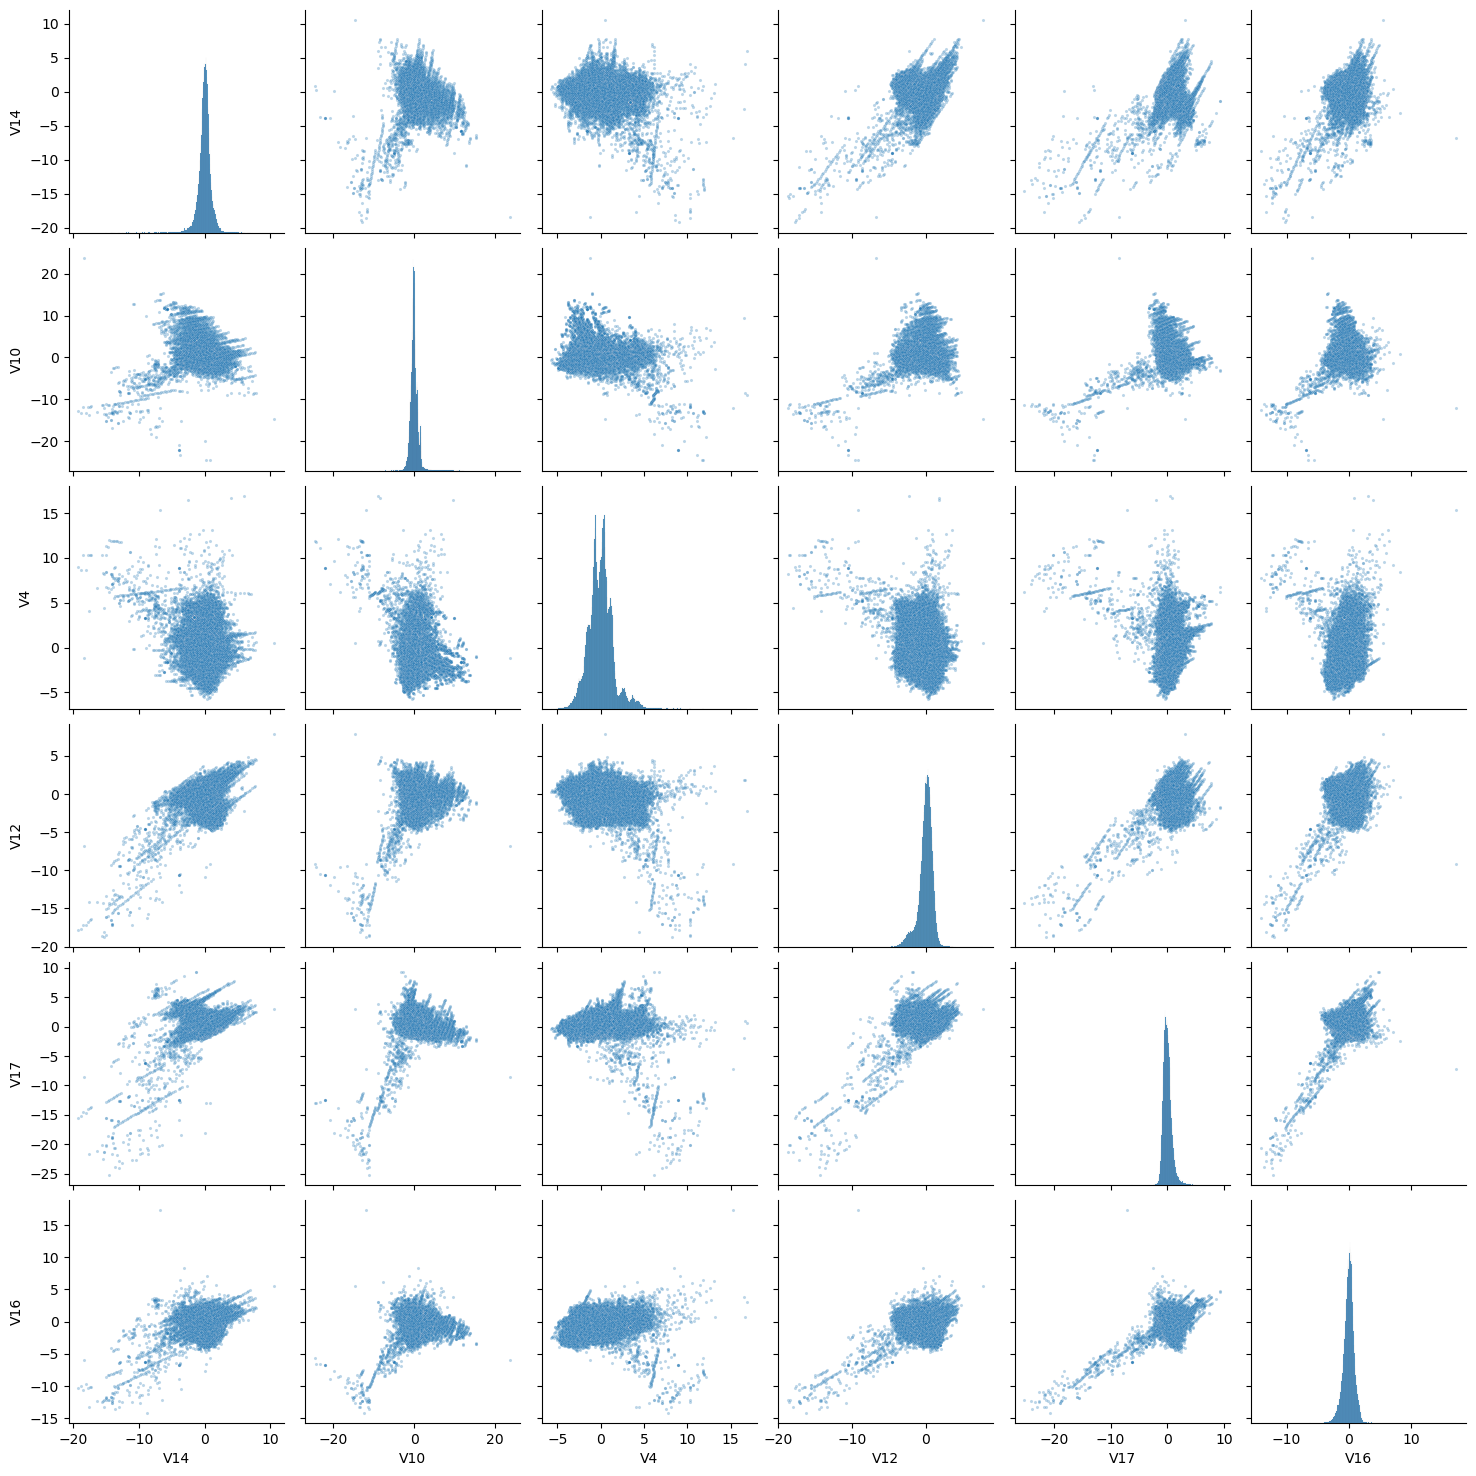

Total variance explained by PC1 and PC2: 48.36%


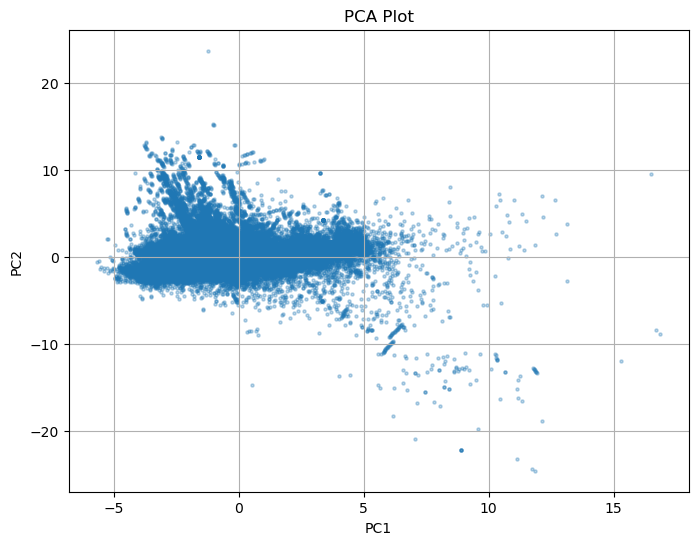

In [107]:
from sklearn.decomposition import PCA

features = X.columns

# Boxplots
plt.figure(figsize=(15, 8))
for idx, feature in enumerate(features, 1):
    plt.subplot(2, 3, idx)
    sns.boxplot(y=X[feature], whis=1.5)
    plt.title(f'Boxplot: {feature}')
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(15, 8))
for idx, feature in enumerate(features, 1):
    plt.subplot(2, 3, idx)
    plt.hist(X[feature], bins='auto', color='skyblue', edgecolor='skyblue')
    plt.title(f'Histogram: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#Pairplots
sns.pairplot(X, plot_kws={'s': 5, 'alpha': 0.3})
plt.show()

# PCA
X_values = X[features].values
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_values)
explained_var = pca.explained_variance_ratio_
print(f"Total variance explained by PC1 and PC2: {explained_var.sum()*100:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(pcs[:, 0], pcs[:, 1], s=5, alpha=0.3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.grid(True)
plt.show()


In [108]:
from collections import Counter
def IQR_method(df,n,features, k=1.5):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = k * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

# Detect anomalies via IQR method
outlier_indices = IQR_method(X, n=1, features=features, k=4.5)

# # Prepare a plotting DataFrame with an 'anomaly' flag
df_out = X[features].copy()
df_out['iqr_anomaly'] = 'normal'
df_out.loc[outlier_indices, 'iqr_anomaly'] = 'outlier'


Total number of outliers is: 234


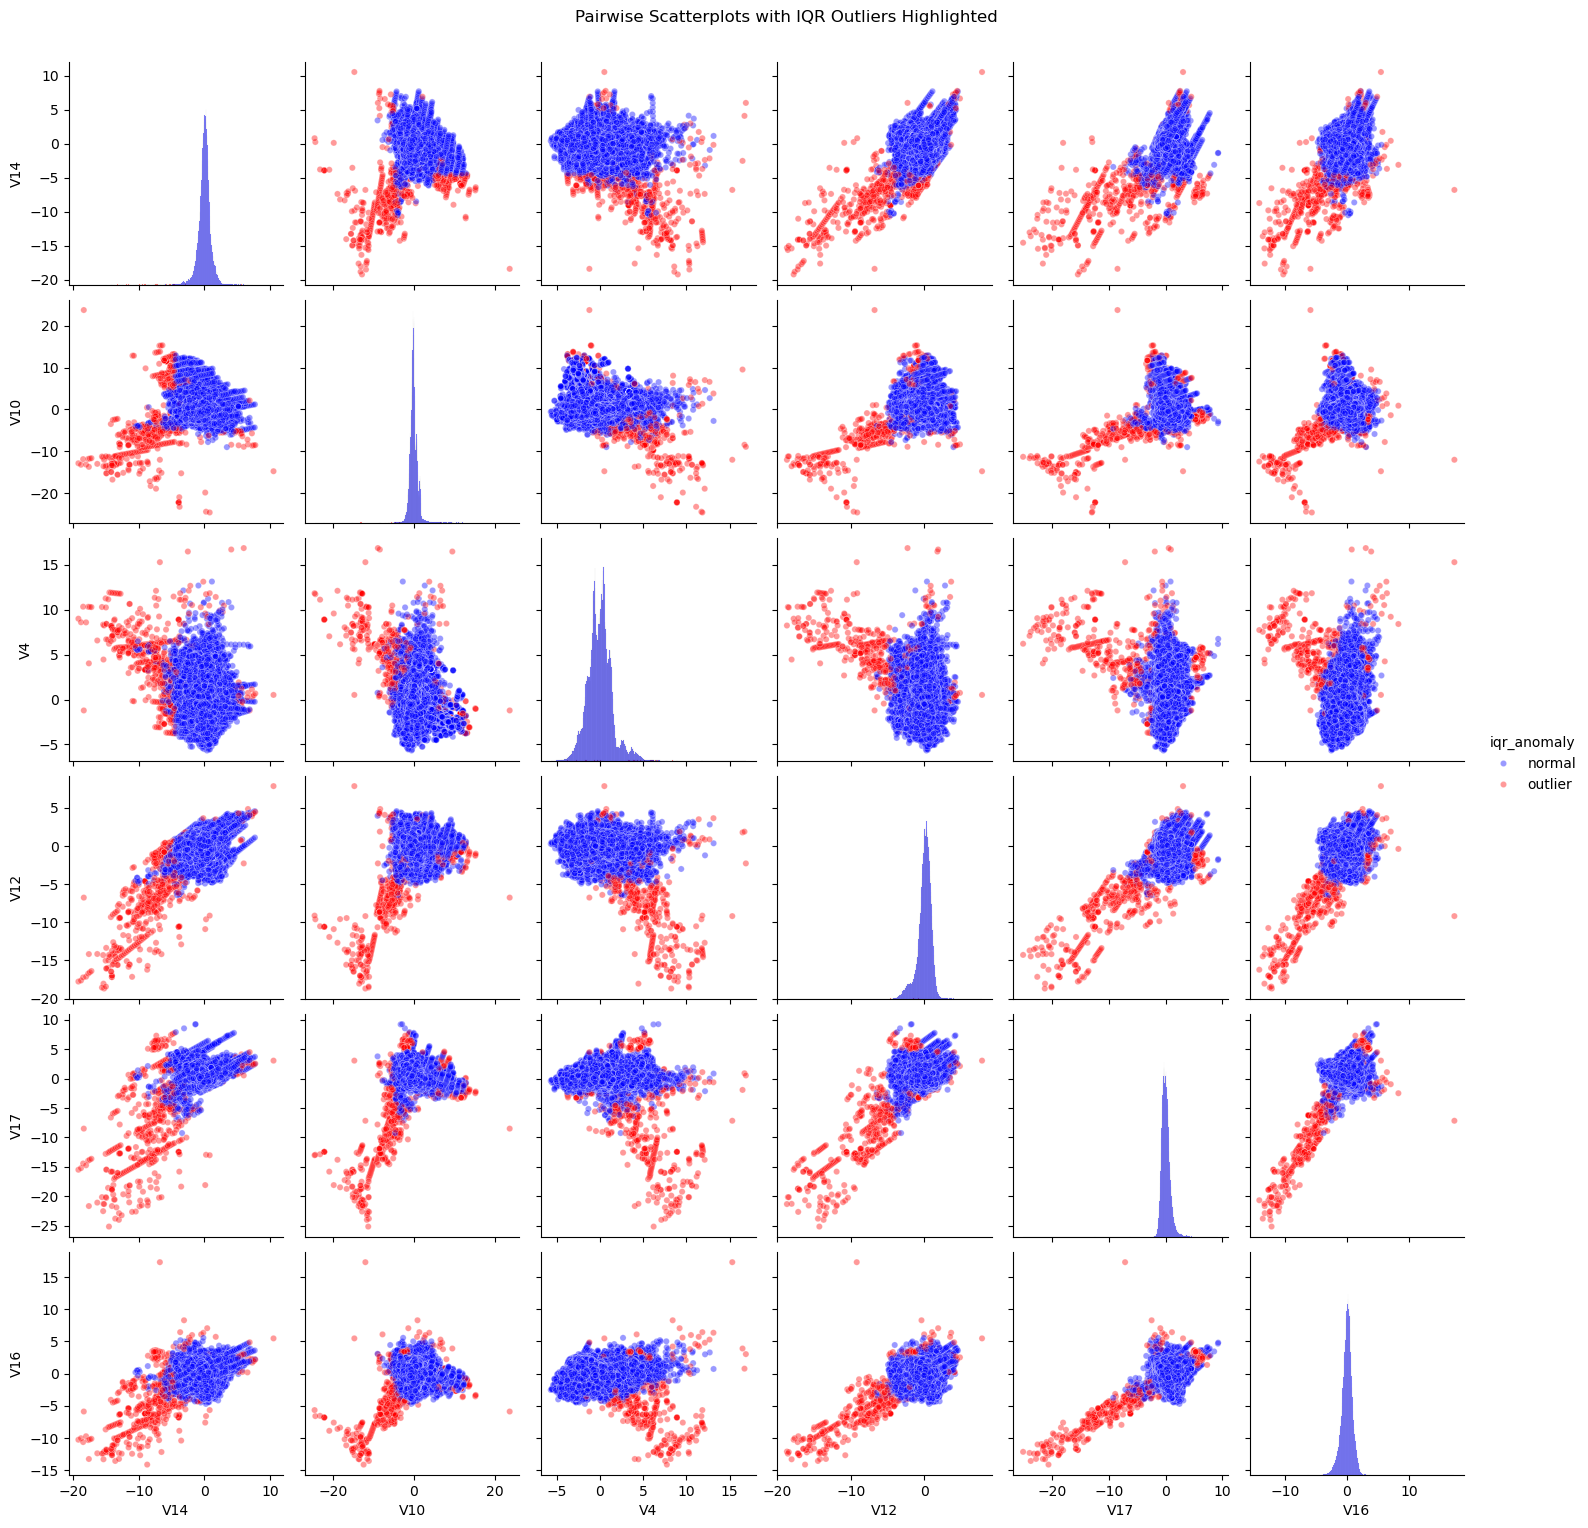

In [110]:
# Pairplot with anomalies highlighted
sns.pairplot(
    df_out,
    vars=features,
    hue='iqr_anomaly',
    palette={'normal': 'blue', 'outlier': 'red'},
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Pairwise Scatterplots with IQR Outliers Highlighted', y=1.02)
plt.show()

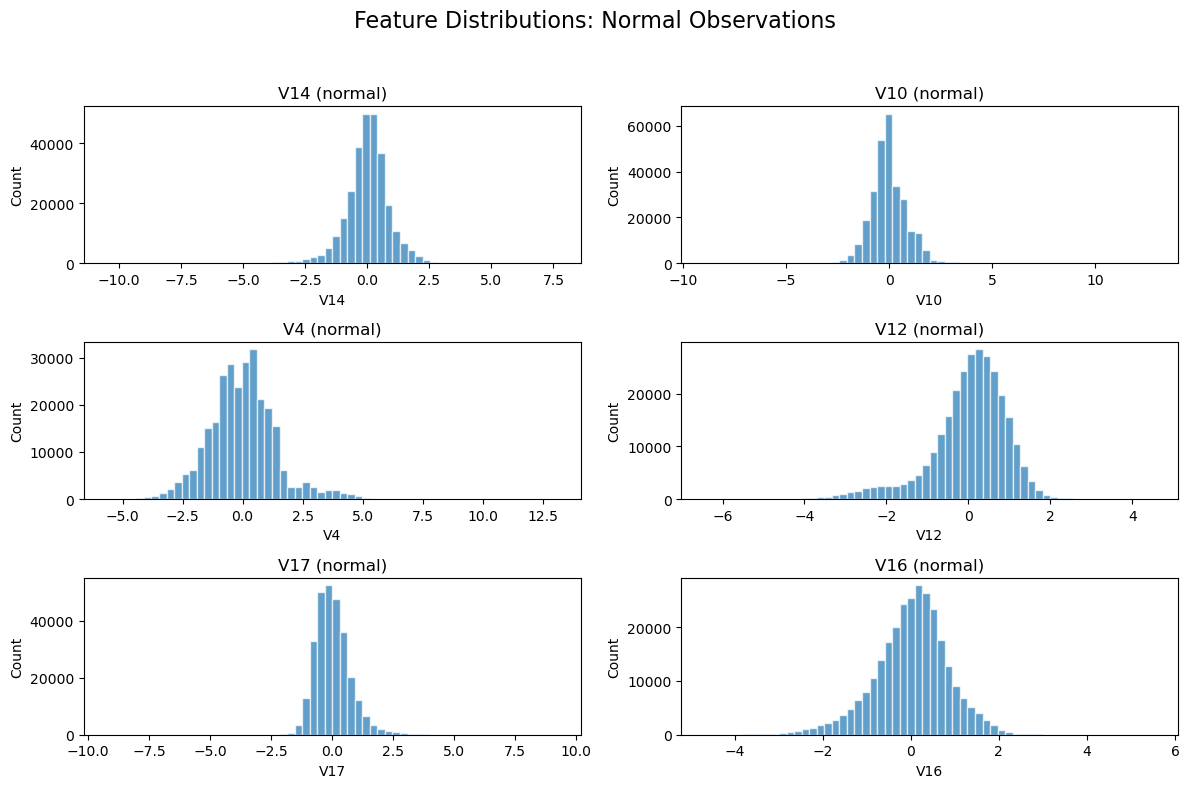

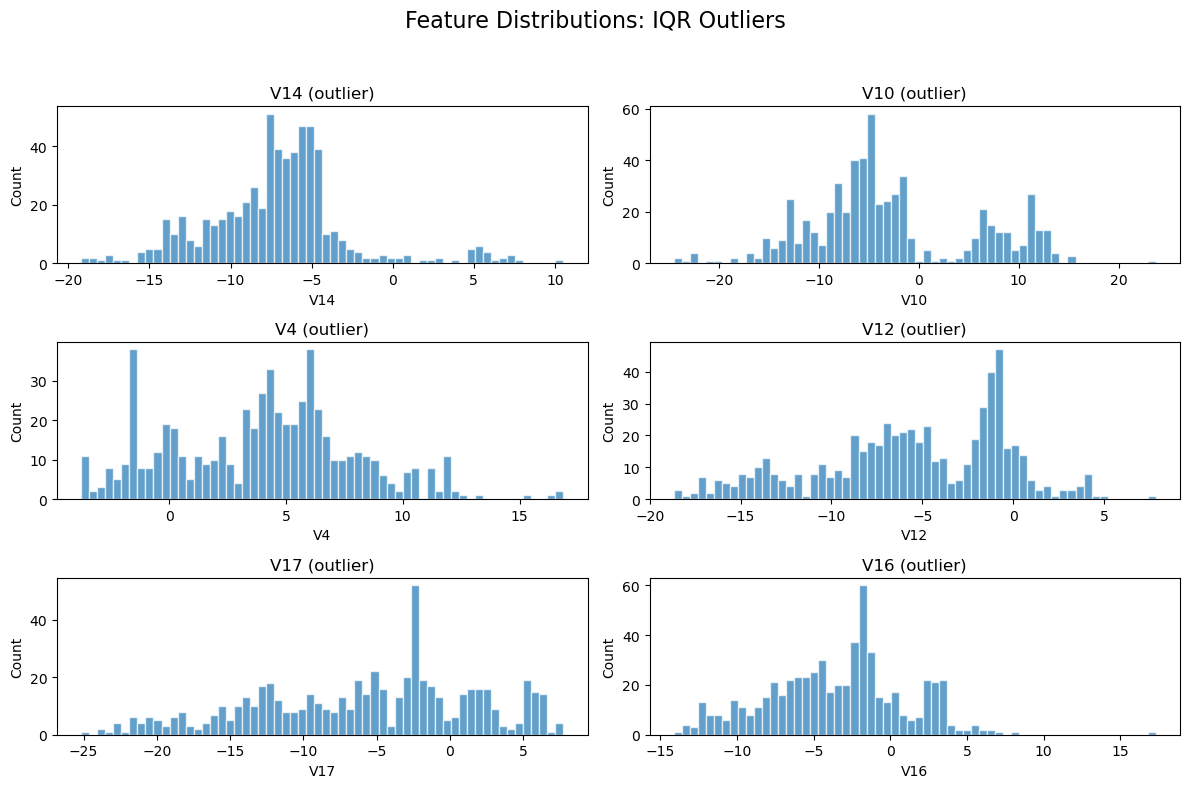

In [111]:
df_norm = df_out[df_out['iqr_anomaly'] == 'normal']
df_outlier  = df_out[df_out['iqr_anomaly'] == 'outlier']

fig1, axes1 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig1.suptitle('Feature Distributions: Normal Observations', size=16)

for ax, feat in zip(axes1.flatten(), features):
    ax.hist(
        df_norm[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (normal)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


fig2, axes2 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig2.suptitle('Feature Distributions: IQR Outliers', size=16)

for ax, feat in zip(axes2.flatten(), features):
    ax.hist(
        df_outlier[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (outlier)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [112]:
# Evaluate how well IQR outliers correspond to actual frauds
# Treat IQR outlier=1 as "predicted fraud", normal=0 as "predicted non‑fraud"
df_out['pred_iqr'] = 0
df_out.loc[outlier_indices, 'pred_iqr'] = 1

y_true = df['Class']
y_pred = df_out['pred_iqr']

print("=== IQR Outlier Detection vs. True Fraud Labels ===")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['non‑fraud','fraud']))

cm = confusion_matrix(y_true, y_pred)
cm_df_out = pd.DataFrame(cm,
                     index=['true_non‑fraud','true_fraud'],
                     columns=['pred_non‑fraud','pred_fraud'])
print("\nConfusion Matrix:")
print(cm_df_out)

outlier_fraction = len(df[df['Class'] == 1])/float(len(df[df['Class'] == 0]))
outlier_fraction_pred_iqr = df_out['pred_iqr'].sum() / len(df_out)
print(f"Predicted Outlier Fraction by IQR: {outlier_fraction_pred_iqr:.6f}")
print(f"\nReal Outlier Fraction (actual fraud rate in dataset): {outlier_fraction:.6f}")

=== IQR Outlier Detection vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‑fraud       1.00      1.00      1.00    284315
       fraud       0.54      0.65      0.59       492

    accuracy                           1.00    284807
   macro avg       0.77      0.83      0.79    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non‑fraud  pred_fraud
true_non‑fraud          284037         278
true_fraud                 171         321
Predicted Outlier Fraction by IQR: 0.002103

Real Outlier Fraction (actual fraud rate in dataset): 0.001730


In [113]:
from sklearn.ensemble import IsolationForest
iso_model = IsolationForest(n_estimators=100, contamination=0.00172, n_jobs=-1)
iso_model.fit(X)
pred_iso = iso_model.predict(X)
df_out['pred_iso'] = np.where(pred_iso == -1, 1, 0)
df_out['pred_iso'].value_counts()

y_true = df['Class']               
y_pred = df_out['pred_iso']       

print("=== Isolation Forest Detection vs. True Fraud Labels ===")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['non-fraud', 'fraud']))

cm = confusion_matrix(y_true, y_pred)
cm_df_iso = pd.DataFrame(cm,
                         index=['true_non-fraud', 'true_fraud'],
                         columns=['pred_non-fraud', 'pred_fraud'])
print("\nConfusion Matrix:")
print(cm_df_iso)

outlier_fraction_pred_iso = df_out['pred_iso'].sum() / len(df_out)
print(f"Predicted Outlier Fraction by Isolation Forest: {outlier_fraction_pred_iso:.6f}")
print(f"\nReal Outlier Fraction (actual fraud rate in dataset): {outlier_fraction:.6f}")


=== Isolation Forest Detection vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.69      0.69      0.69       492

    accuracy                           1.00    284807
   macro avg       0.85      0.84      0.84    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          284164         151
true_fraud                 153         339
Predicted Outlier Fraction by Isolation Forest: 0.001720

Real Outlier Fraction (actual fraud rate in dataset): 0.001730


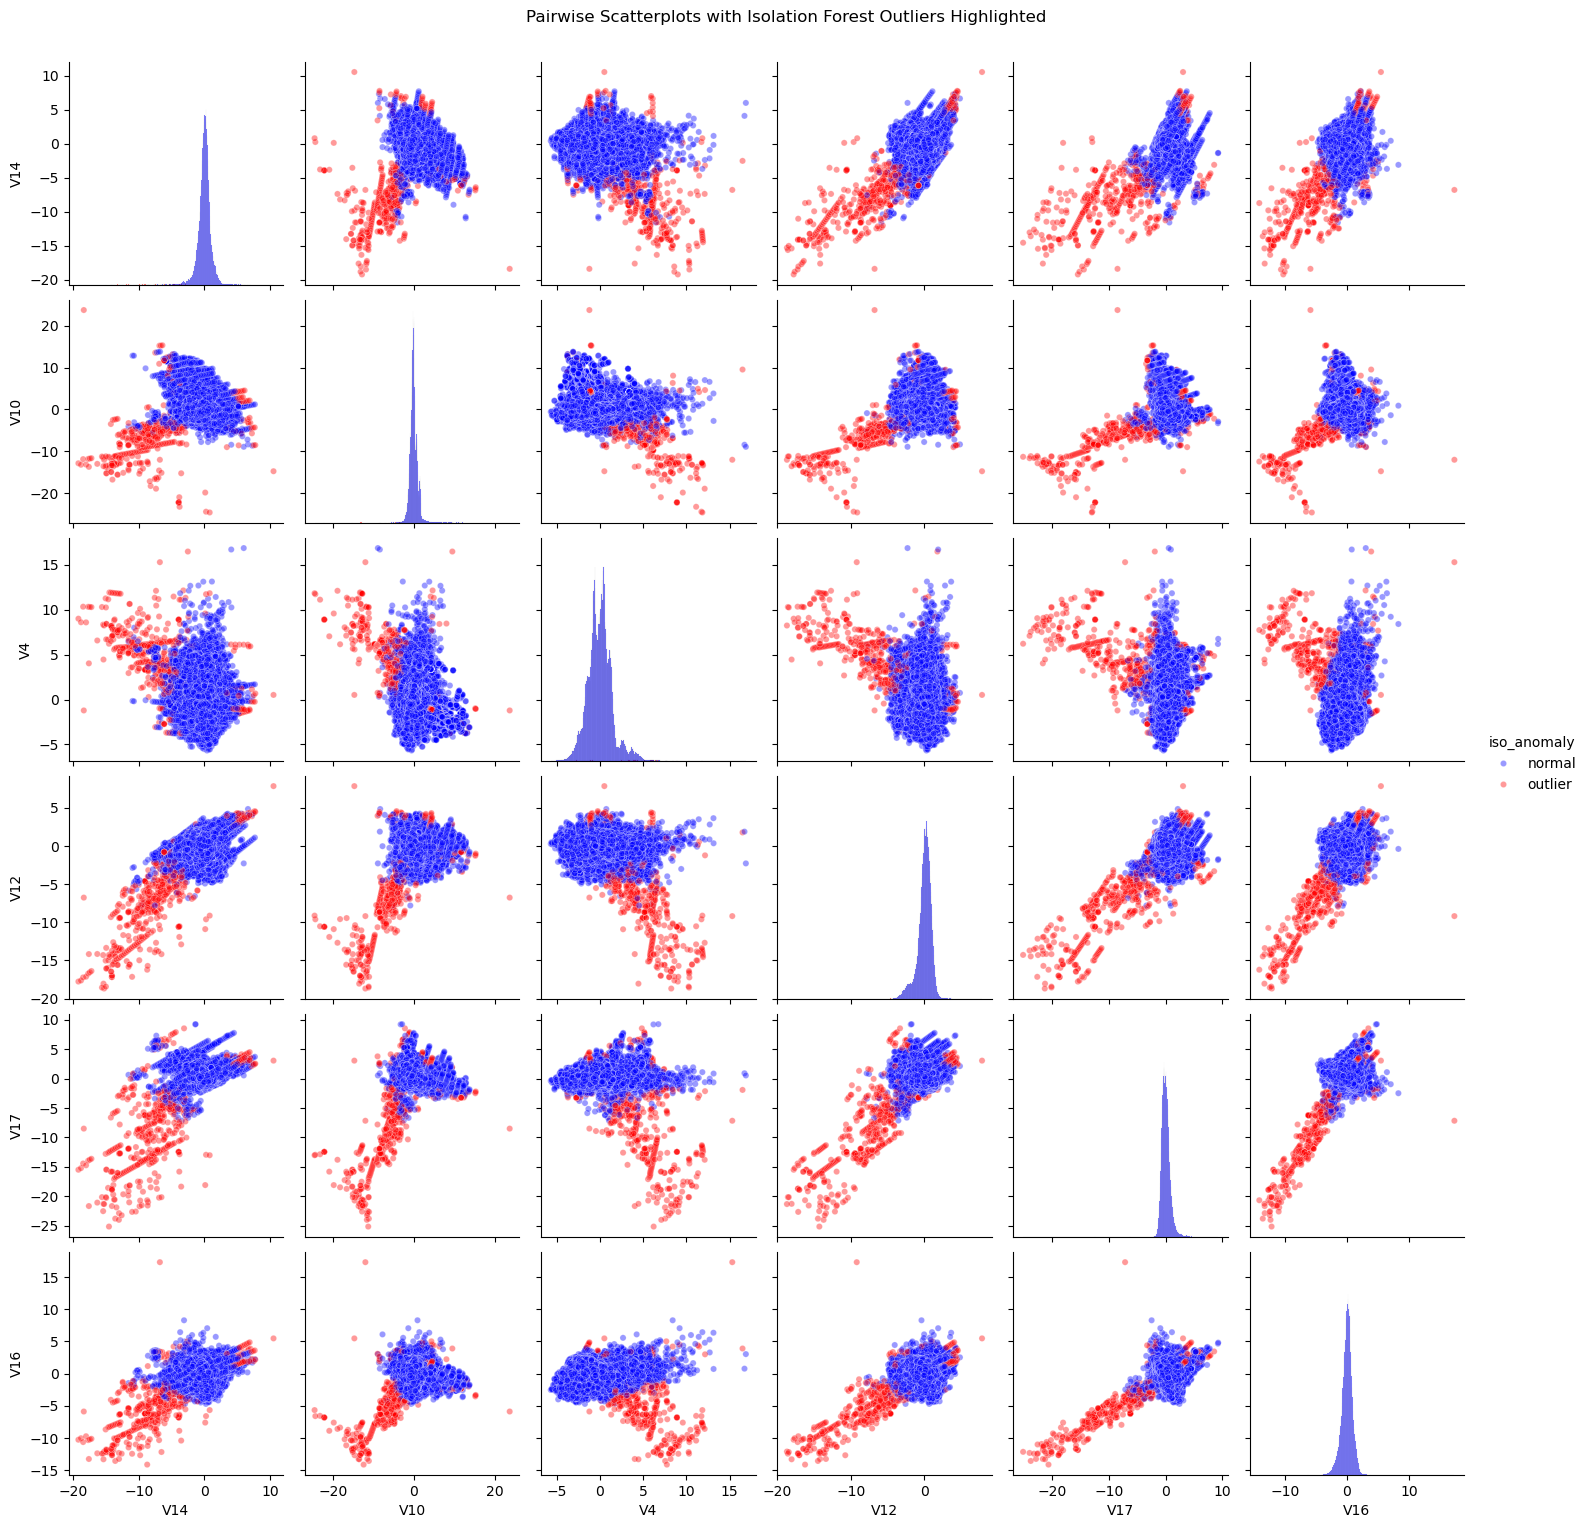

In [114]:
df_out['iso_anomaly'] = np.where(pred_iso == -1, 'outlier', 'normal')

sns.pairplot(
    df_out,
    vars=features,
    hue='iso_anomaly',
    palette={'normal': 'blue', 'outlier': 'red'},
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Pairwise Scatterplots with Isolation Forest Outliers Highlighted', y=1.02)
plt.show()

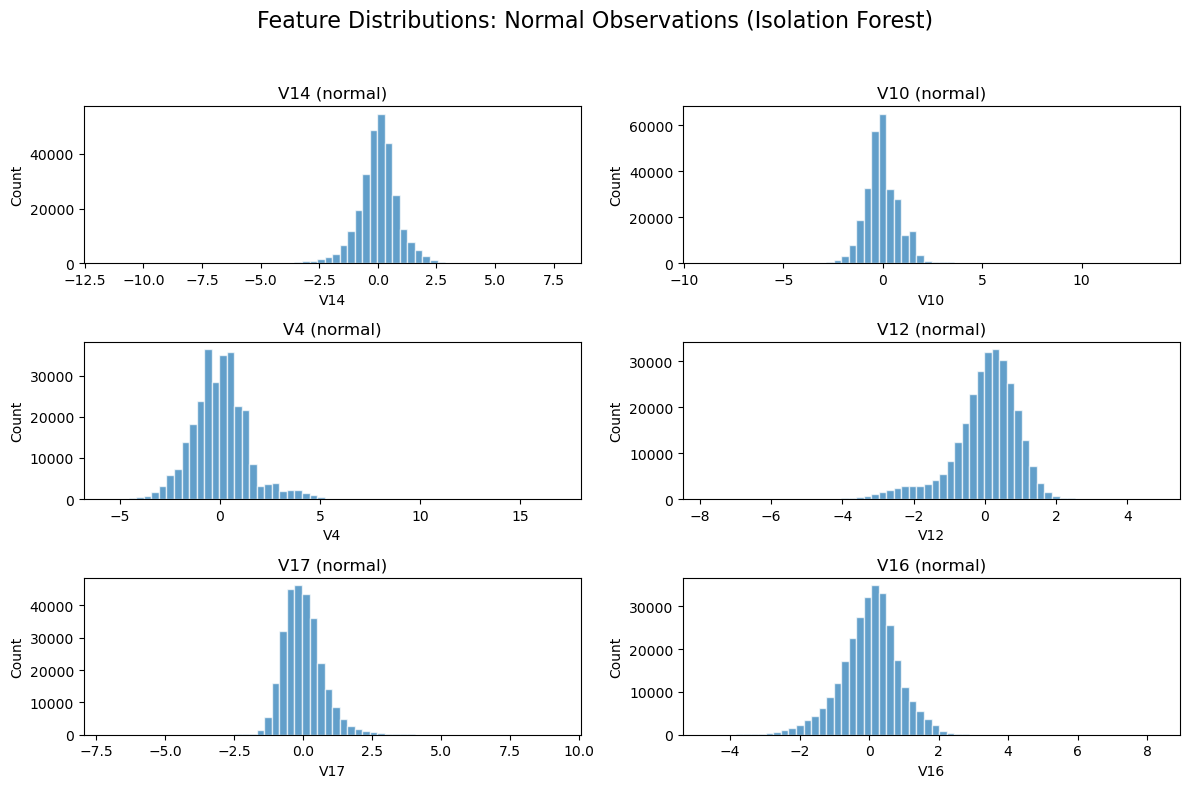

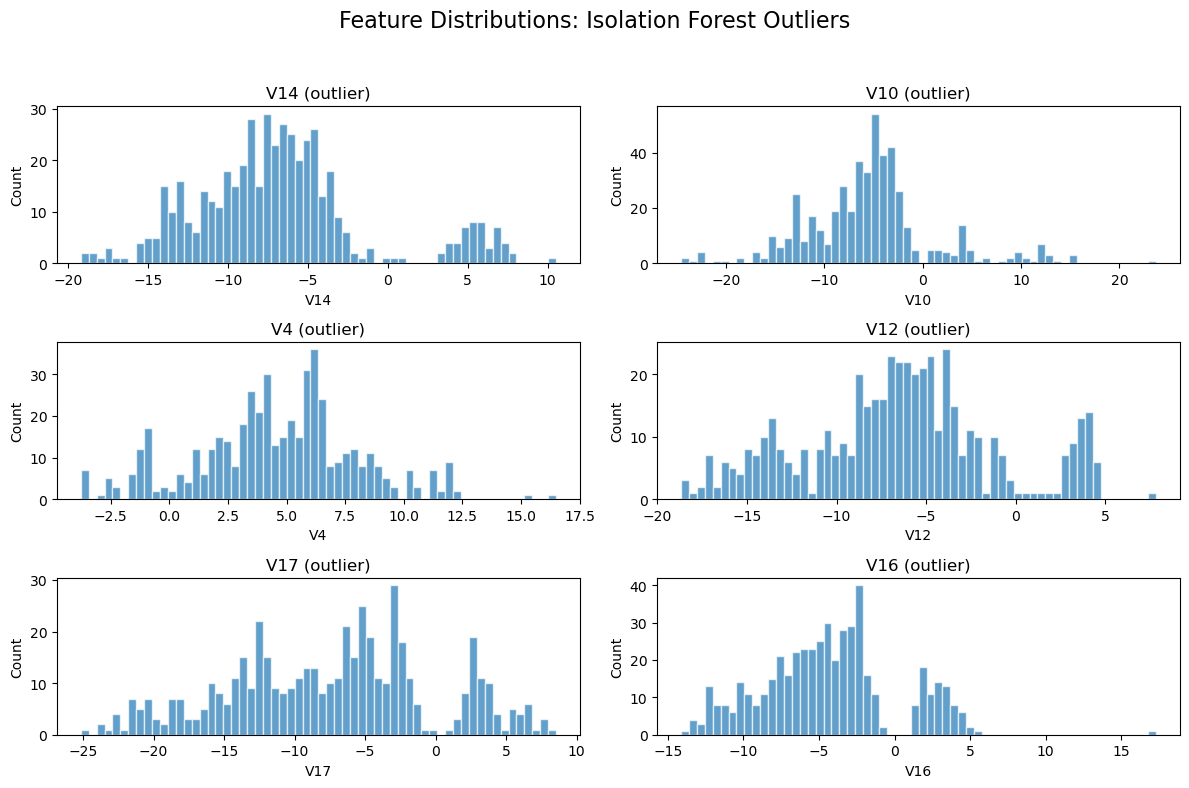

In [116]:
df_norm_iso = df_out[df_out['iso_anomaly'] == 'normal']
df_outlier_iso = df_out[df_out['iso_anomaly'] == 'outlier']

fig1, axes1 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig1.suptitle('Feature Distributions: Normal Observations (Isolation Forest)', size=16)

for ax, feat in zip(axes1.flatten(), features):
    ax.hist(
        df_norm_iso[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (normal)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig2, axes2 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig2.suptitle('Feature Distributions: Isolation Forest Outliers', size=16)

for ax, feat in zip(axes2.flatten(), features):
    ax.hist(
        df_outlier_iso[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (outlier)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [117]:
from sklearn.covariance import EllipticEnvelope
ell_model = EllipticEnvelope(contamination=0.00172, assume_centered=False, support_fraction=0.85)
ell_model.fit(X)
pred_ell = ell_model.predict(X)
df_out['pred_ell'] = np.where(pred_ell == -1, 1, 0)
df_out['pred_ell'].value_counts()

y_true = df['Class']               
y_pred = df_out['pred_ell']       

print("=== Elliptic Envelope Detection vs. True Fraud Labels ===")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['non-fraud', 'fraud']))

cm = confusion_matrix(y_true, y_pred)
cm_df_ell = pd.DataFrame(cm,
                         index=['true_non-fraud', 'true_fraud'],
                         columns=['pred_non-fraud', 'pred_fraud'])
print("\nConfusion Matrix:")
print(cm_df_ell)

outlier_fraction_pred_ell = df_out['pred_ell'].sum() / len(df_out)
print(f"Predicted Outlier Fraction by Elliptic Envelope: {outlier_fraction_pred_ell:.6f}")
print(f"\nReal Outlier Fraction (actual fraud rate in dataset): {outlier_fraction:.6f}")

=== Elliptic Envelope Detection vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.73      0.73      0.73       492

    accuracy                           1.00    284807
   macro avg       0.87      0.86      0.86    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          284183         132
true_fraud                 134         358
Predicted Outlier Fraction by Elliptic Envelope: 0.001720

Real Outlier Fraction (actual fraud rate in dataset): 0.001730


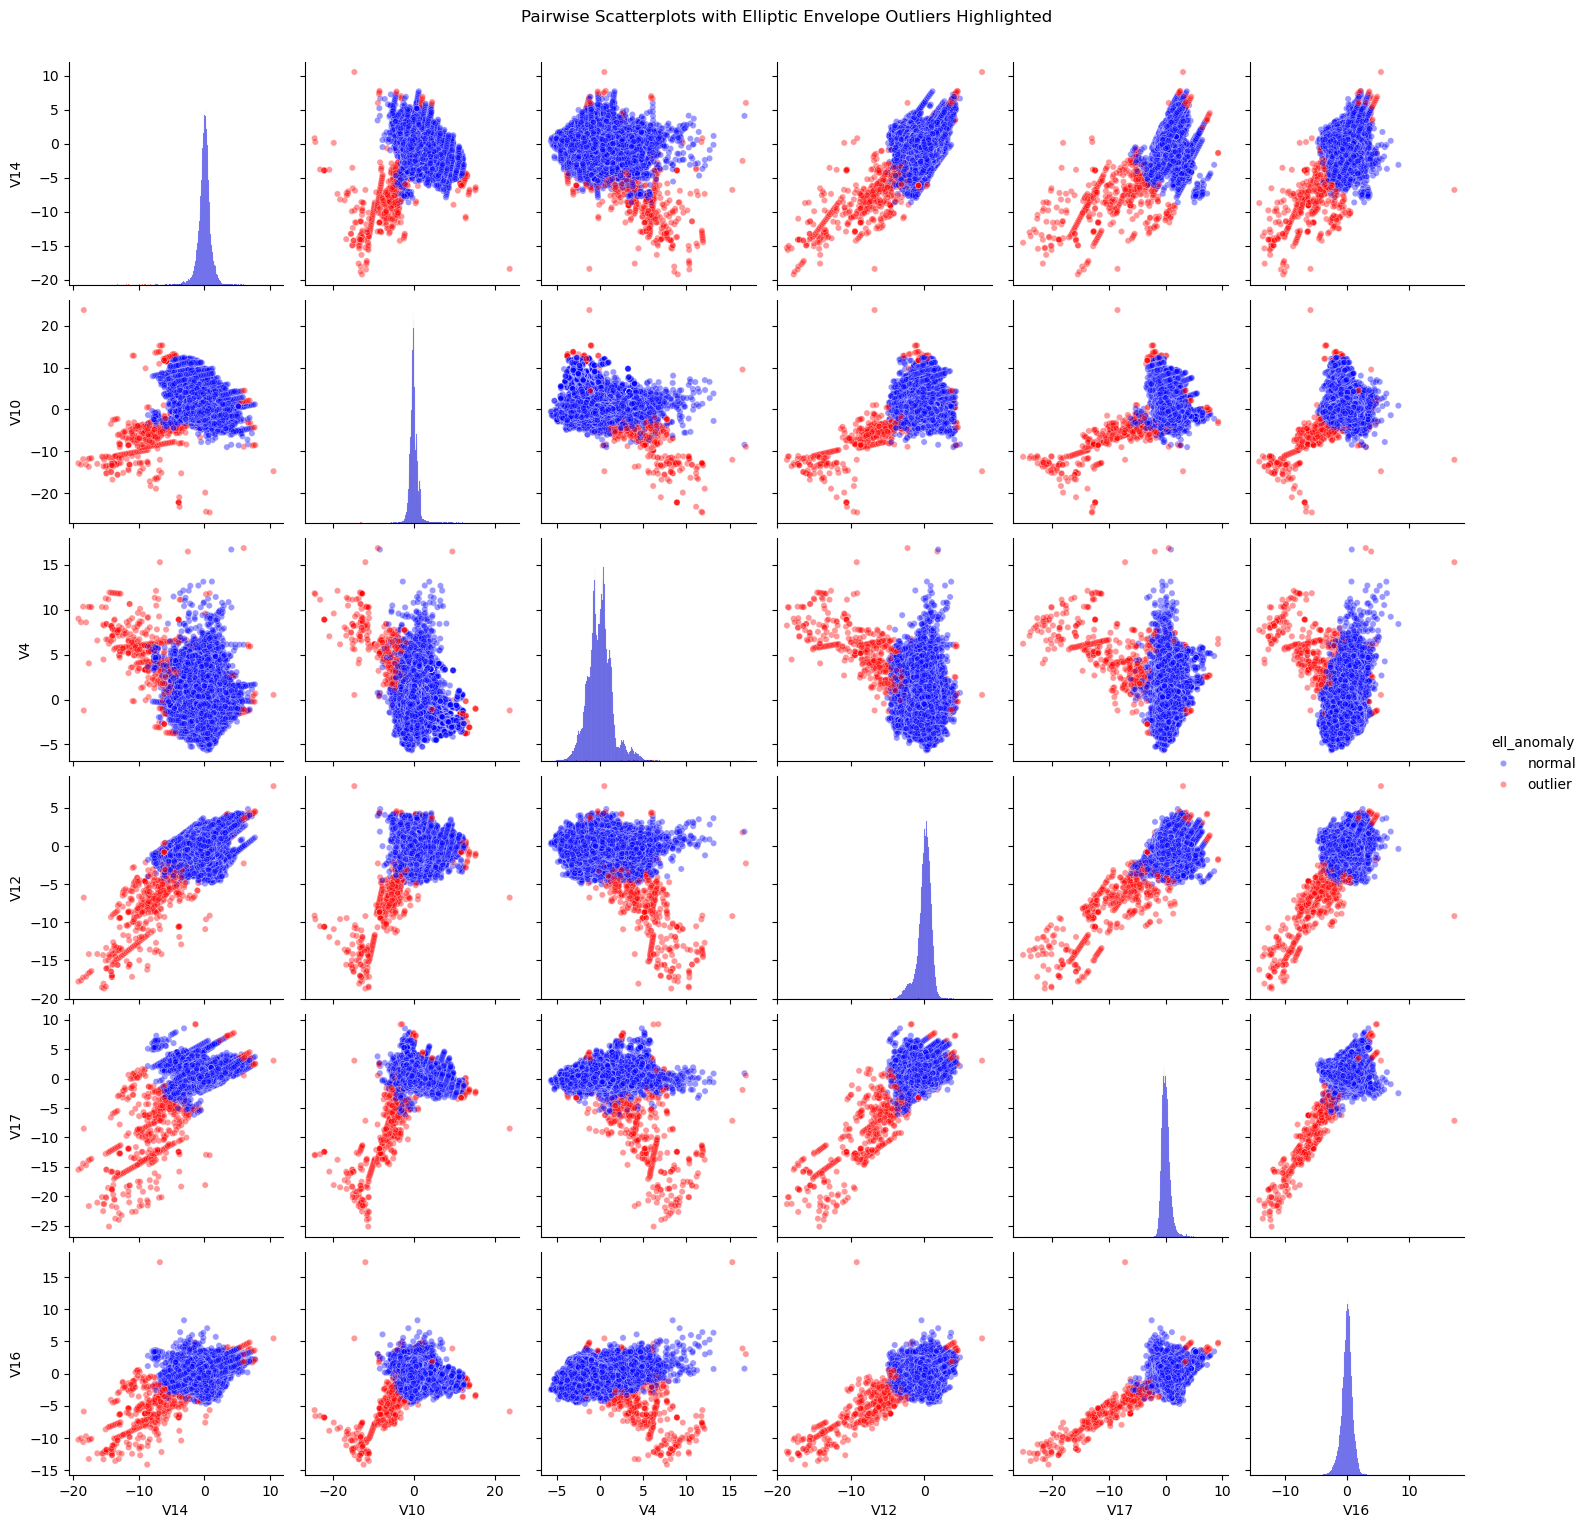

In [118]:
df_out['ell_anomaly'] = np.where(pred_ell == -1, 'outlier', 'normal')

sns.pairplot(
    df_out,
    vars=features,
    hue='ell_anomaly',
    palette={'normal': 'blue', 'outlier': 'red'},
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Pairwise Scatterplots with Elliptic Envelope Outliers Highlighted', y=1.02)
plt.show()


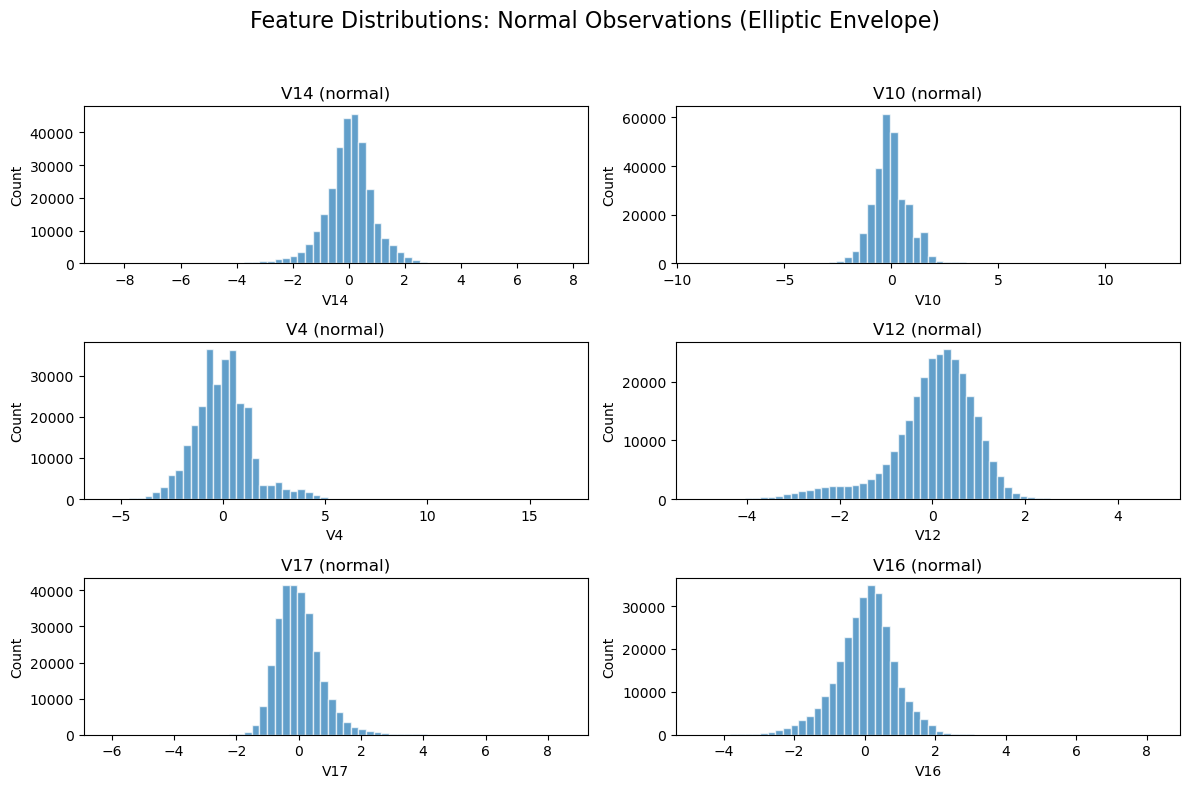

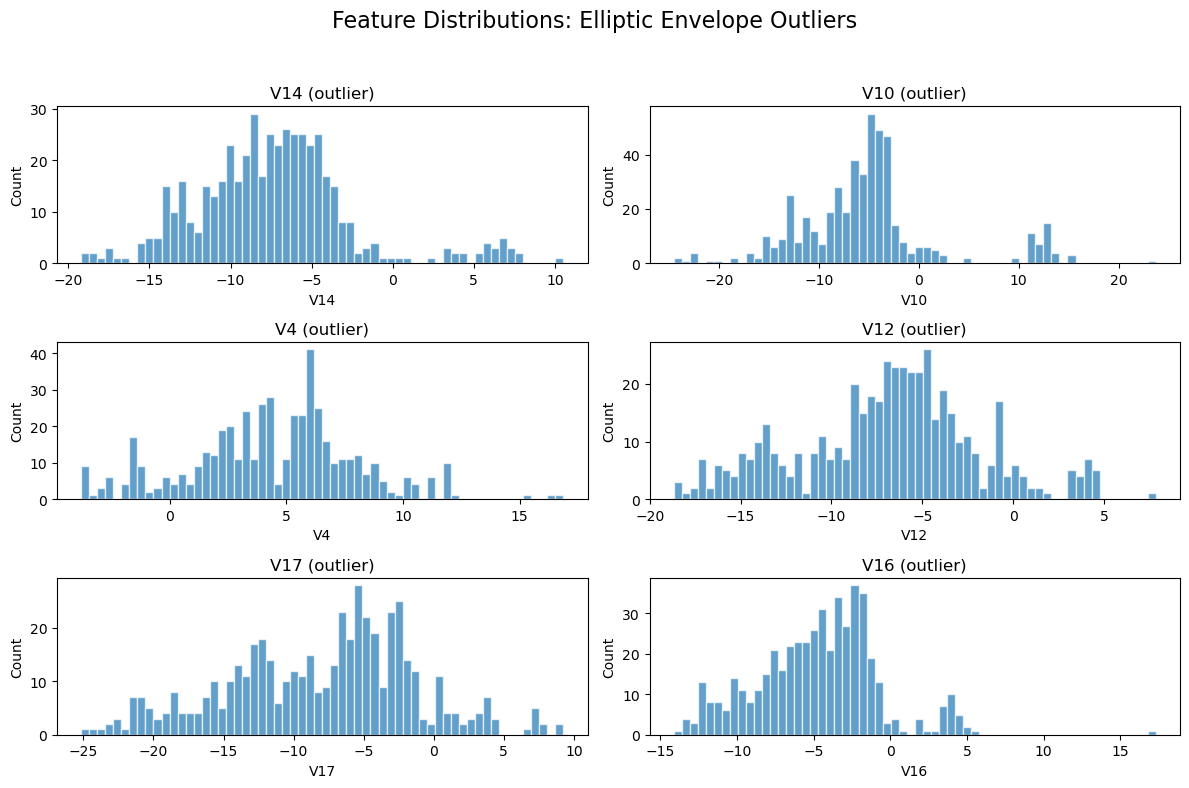

In [119]:
df_norm_ell = df_out[df_out['ell_anomaly'] == 'normal']
df_outlier_ell = df_out[df_out['ell_anomaly'] == 'outlier']

fig1, axes1 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig1.suptitle('Feature Distributions: Normal Observations (Elliptic Envelope)', size=16)

for ax, feat in zip(axes1.flatten(), features):
    ax.hist(
        df_norm_ell[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (normal)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig2, axes2 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig2.suptitle('Feature Distributions: Elliptic Envelope Outliers', size=16)

for ax, feat in zip(axes2.flatten(), features):
    ax.hist(
        df_outlier_ell[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (outlier)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [120]:
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors=1000 , contamination=0.00172, n_jobs=-1)
pred_lof = lof_model.fit_predict(X)
df_out['pred_lof'] = np.where(pred_lof == -1, 1, 0)
df_out['pred_lof'].value_counts()

y_true = df['Class']               
y_pred = df_out['pred_lof']       

print("=== LOF Detection vs. True Fraud Labels ===")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['non-fraud', 'fraud']))

cm = confusion_matrix(y_true, y_pred)
cm_df_lof = pd.DataFrame(cm,
                         index=['true_non-fraud', 'true_fraud'],
                         columns=['pred_non-fraud', 'pred_fraud'])
print("\nConfusion Matrix:")
print(cm_df_lof)

outlier_fraction_pred_lof = df_out['pred_lof'].sum() / len(df_out)
print(f"\nPredicted Outlier Fraction by LOF: {outlier_fraction_pred_lof:.6f}")

print(f"Real Outlier Fraction (actual fraud rate in dataset): {outlier_fraction:.6f}")


=== LOF Detection vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.73      0.73      0.73       492

    accuracy                           1.00    284807
   macro avg       0.87      0.87      0.87    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          284185         130
true_fraud                 132         360

Predicted Outlier Fraction by LOF: 0.001720
Real Outlier Fraction (actual fraud rate in dataset): 0.001730


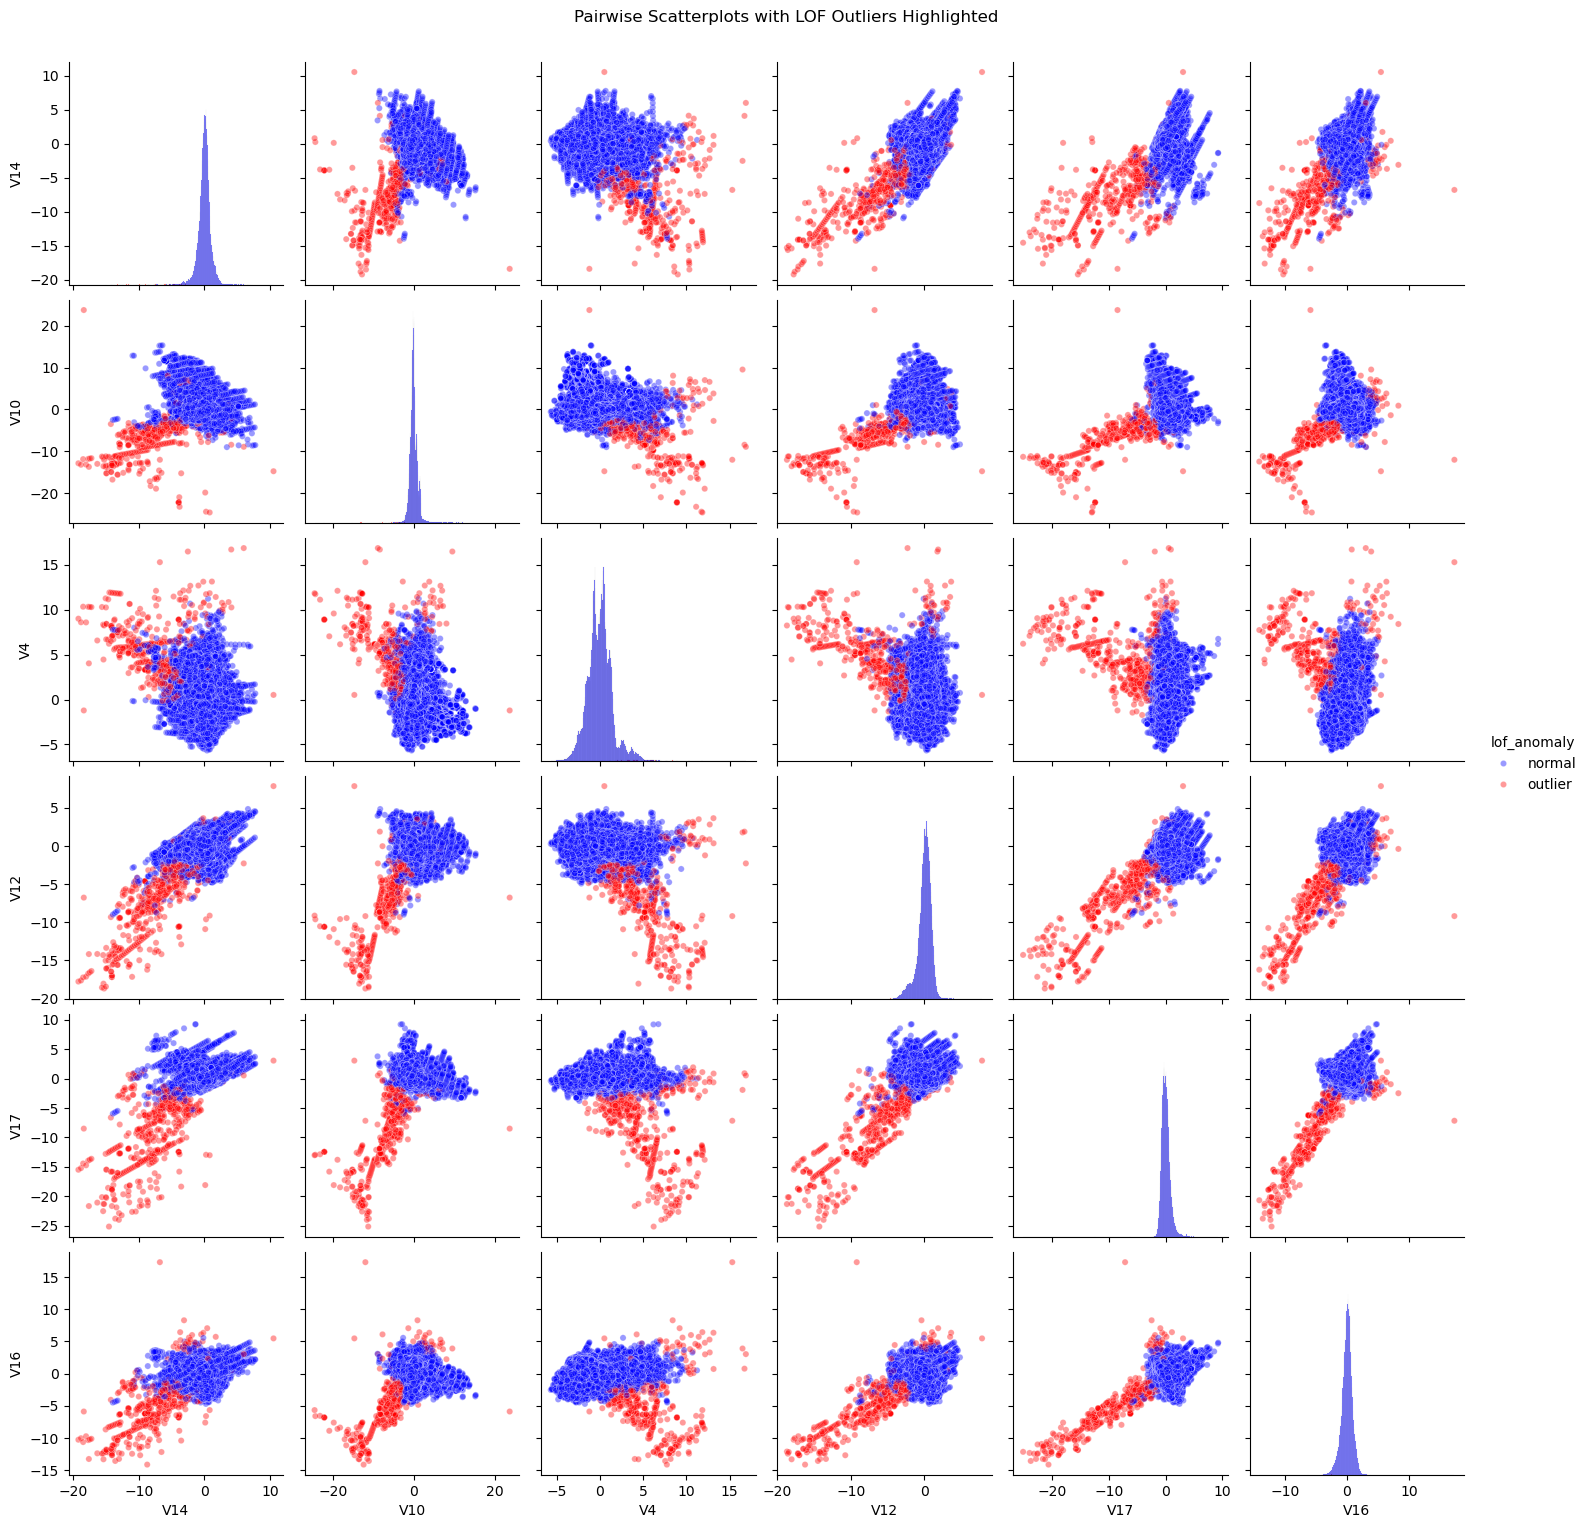

In [121]:
df_out['lof_anomaly'] = np.where(pred_lof == -1, 'outlier', 'normal')

sns.pairplot(
    df_out,
    vars=features,
    hue='lof_anomaly',
    palette={'normal': 'blue', 'outlier': 'red'},
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Pairwise Scatterplots with LOF Outliers Highlighted', y=1.02)
plt.show()


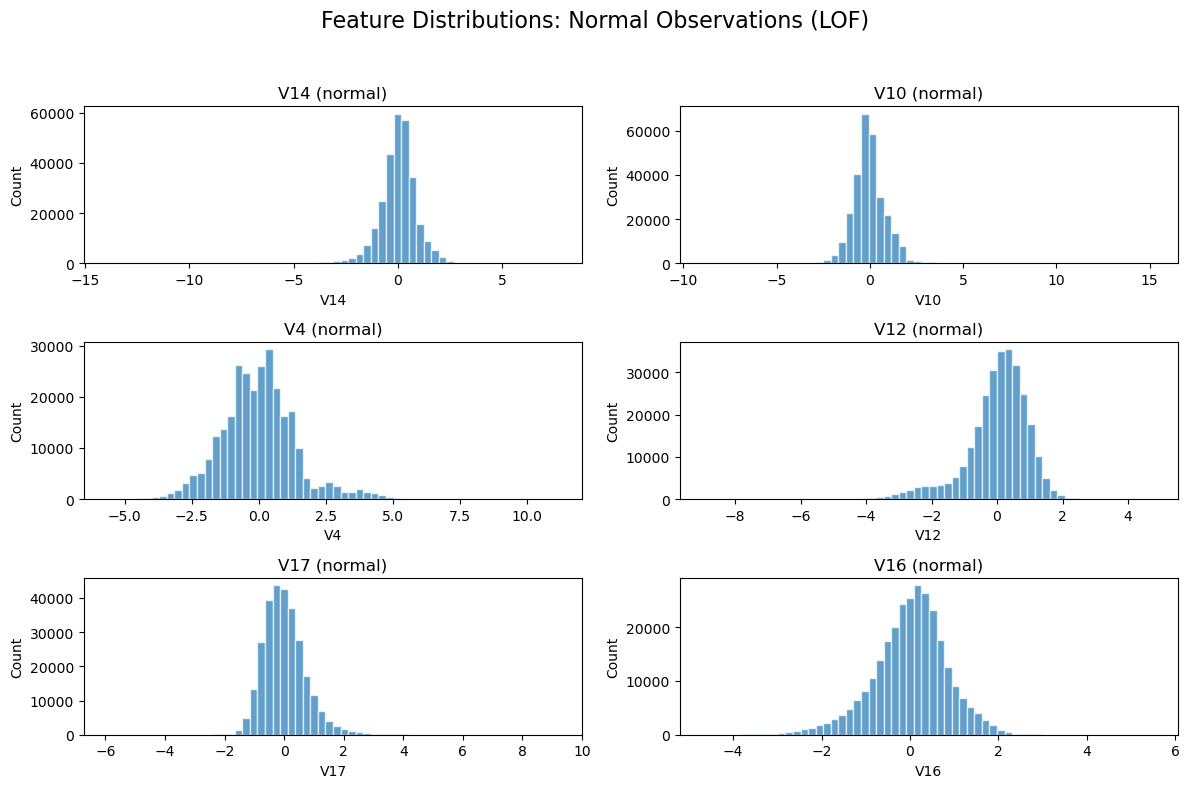

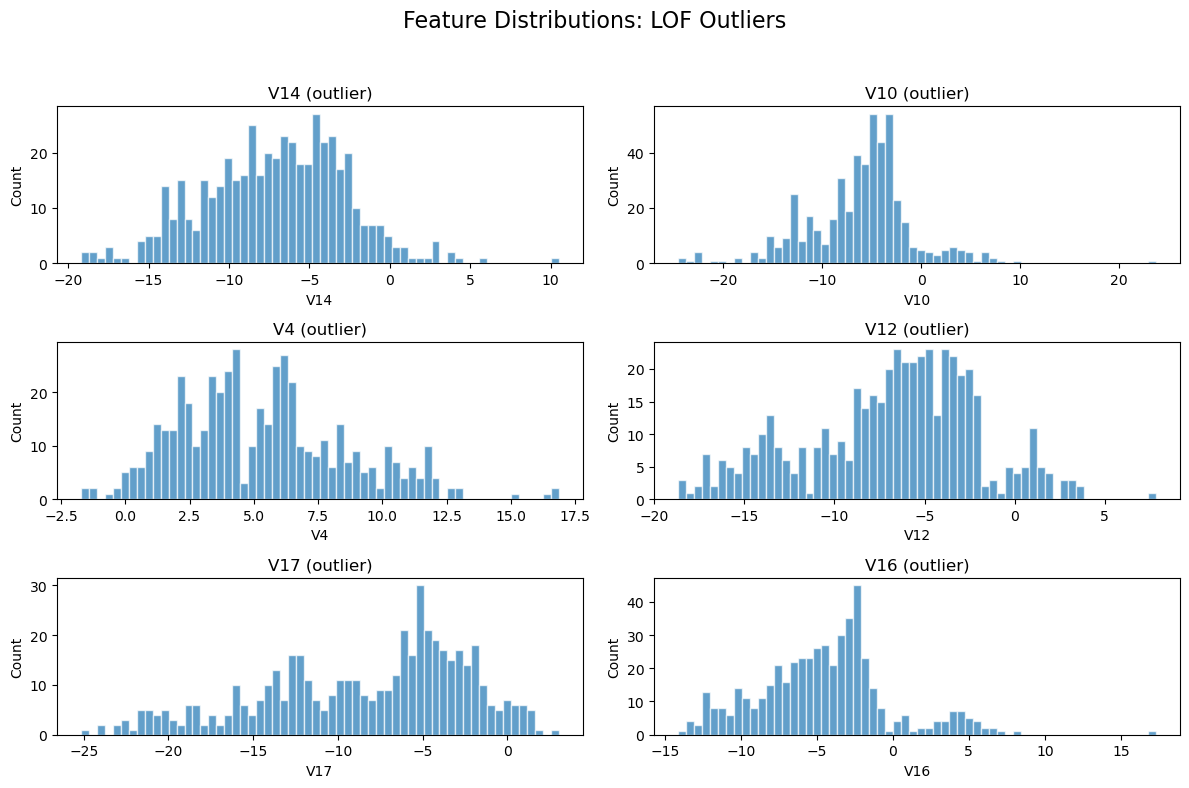

In [122]:
df_norm_lof = df_out[df_out['lof_anomaly'] == 'normal']
df_outlier_lof = df_out[df_out['lof_anomaly'] == 'outlier']

fig1, axes1 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig1.suptitle('Feature Distributions: Normal Observations (LOF)', size=16)

for ax, feat in zip(axes1.flatten(), features):
    ax.hist(
        df_norm_lof[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (normal)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig2, axes2 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig2.suptitle('Feature Distributions: LOF Outliers', size=16)

for ax, feat in zip(axes2.flatten(), features):
    ax.hist(
        df_outlier_lof[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (outlier)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [123]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

svm_model = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.00172)
svm_model.fit(X_scaled)

pred_svm = svm_model.predict(X_scaled)

df_out['pred_svm'] = np.where(pred_svm == -1, 1, 0)
print(df_out['pred_svm'].value_counts())

y_true = df['Class']
y_pred = df_out['pred_svm']

print("=== One-Class SVM Detection vs. True Fraud Labels ===")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['non-fraud', 'fraud']))

cm = confusion_matrix(y_true, y_pred)
cm_df_svm = pd.DataFrame(cm,
                         index=['true_non-fraud', 'true_fraud'],
                         columns=['pred_non-fraud', 'pred_fraud'])
print("\nConfusion Matrix:")
print(cm_df_svm)

outlier_fraction_pred_svm = df_out['pred_svm'].sum() / len(df_out)
print(f"Predicted Outlier Fraction by One-Class SVM: {outlier_fraction_pred_svm:.6f}")
print(f"Real Outlier Fraction (actual fraud rate in dataset): {outlier_fraction:.6f}")


pred_svm
0    284316
1       491
Name: count, dtype: int64
=== One-Class SVM Detection vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.41      0.40      0.40       492

    accuracy                           1.00    284807
   macro avg       0.70      0.70      0.70    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          284023         292
true_fraud                 293         199
Predicted Outlier Fraction by One-Class SVM: 0.001724
Real Outlier Fraction (actual fraud rate in dataset): 0.001730


In [124]:
gammas = [0.001, 0.005, 0.01, 0.05]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel:
    for gamma in gammas:
        model = OneClassSVM(kernel=kernel, gamma=gamma, nu=0.00172 )
        
        pred_svm = model.fit_predict(X)
        y_pred = np.where(pred_svm == -1, 1, 0)
        print(f"nu: 0.00172, kernel: {kernel}, gamma: {gamma}")
        print(classification_report(y_true, y_pred, target_names=['non-fraud', 'fraud']))

nu: 0.00172, kernel: linear, gamma: 0.001
              precision    recall  f1-score   support

   non-fraud       1.00      0.38      0.55    284315
       fraud       0.00      0.11      0.00       492

    accuracy                           0.38    284807
   macro avg       0.50      0.24      0.28    284807
weighted avg       0.99      0.38      0.55    284807

nu: 0.00172, kernel: linear, gamma: 0.005
              precision    recall  f1-score   support

   non-fraud       1.00      0.38      0.55    284315
       fraud       0.00      0.11      0.00       492

    accuracy                           0.38    284807
   macro avg       0.50      0.24      0.28    284807
weighted avg       0.99      0.38      0.55    284807

nu: 0.00172, kernel: linear, gamma: 0.01
              precision    recall  f1-score   support

   non-fraud       1.00      0.38      0.55    284315
       fraud       0.00      0.11      0.00       492

    accuracy                           0.38    284807
   

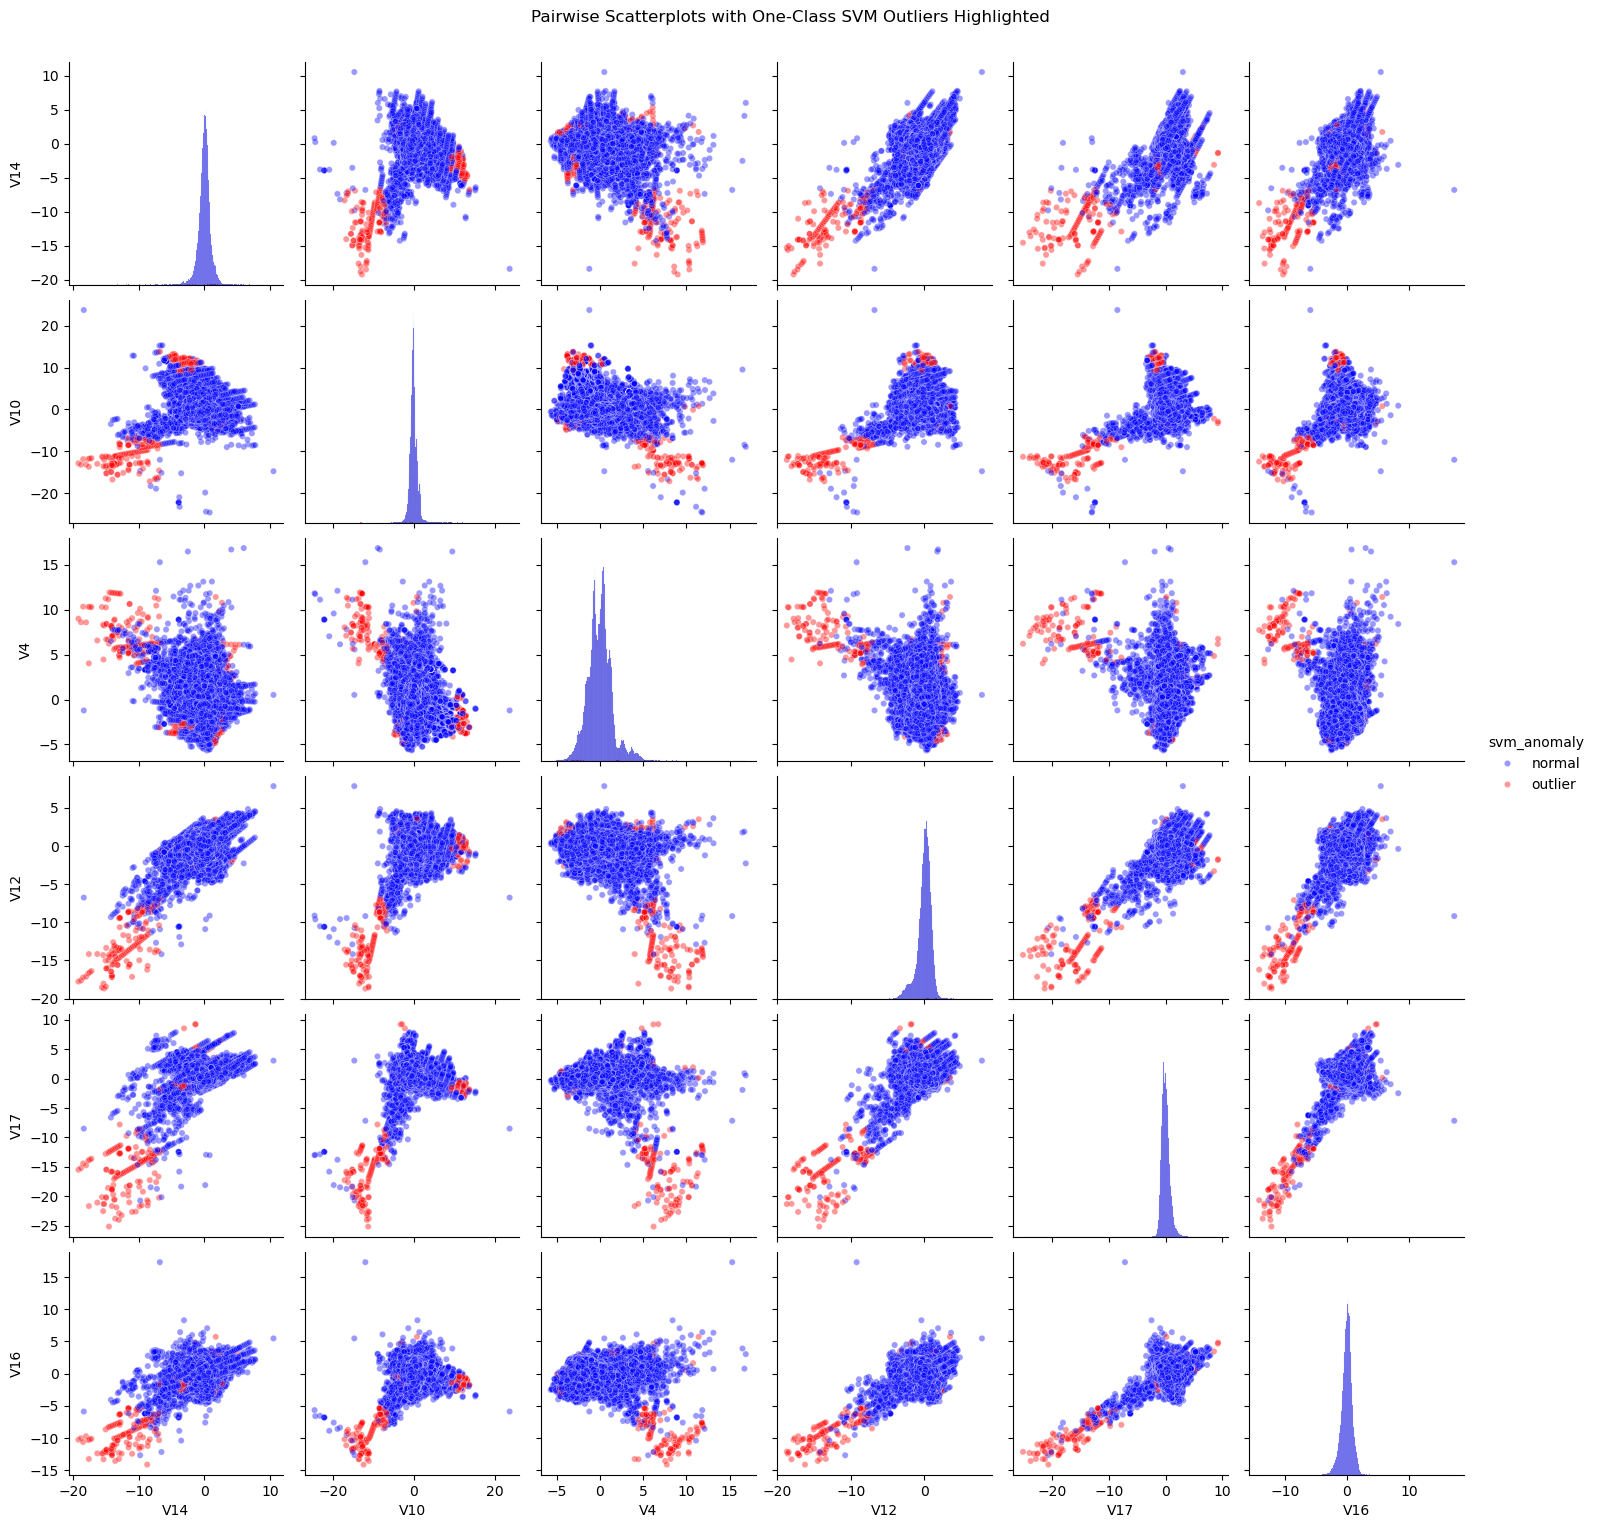

In [125]:
df_out['svm_anomaly'] = np.where(pred_svm == -1, 'outlier', 'normal')

sns.pairplot(
    df_out,
    vars=features,
    hue='svm_anomaly',
    palette={'normal': 'blue', 'outlier': 'red'},
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Pairwise Scatterplots with One-Class SVM Outliers Highlighted', y=1.02)
plt.show()

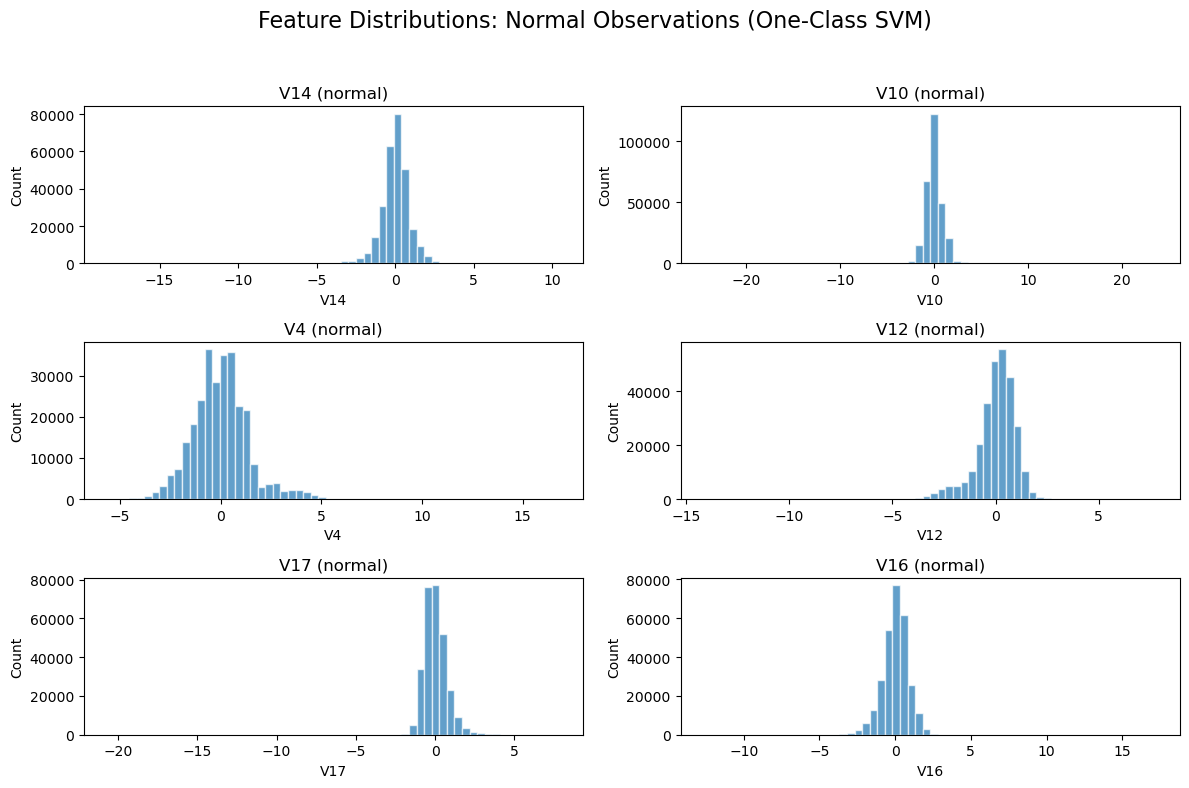

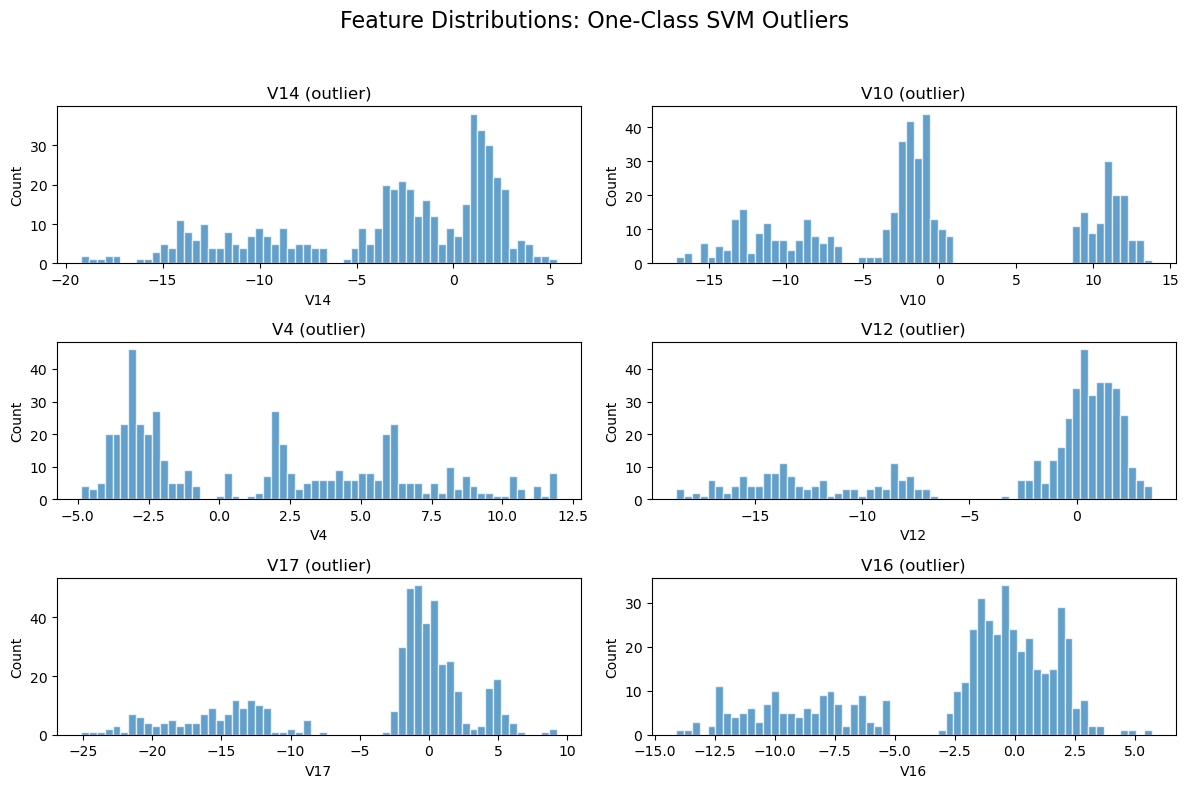

In [126]:
df_out['svm_anomaly'] = np.where(pred_svm == -1, 'outlier', 'normal')

df_norm_svm = df_out[df_out['svm_anomaly'] == 'normal']
df_outlier_svm = df_out[df_out['svm_anomaly'] == 'outlier']

fig1, axes1 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig1.suptitle('Feature Distributions: Normal Observations (One-Class SVM)', size=16)

for ax, feat in zip(axes1.flatten(), features):
    ax.hist(
        df_norm_svm[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (normal)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig2, axes2 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig2.suptitle('Feature Distributions: One-Class SVM Outliers', size=16)

for ax, feat in zip(axes2.flatten(), features):
    ax.hist(
        df_outlier_svm[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (outlier)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [129]:
df_out['true_lable'] =y
df_out.sample(3)

V14       V10        V4      V12       V17       V16 iqr_anomaly  \
238114 -0.101423  0.656186  0.598981 0.127882 -0.419007 -0.731373      normal   
107986  0.846840  0.055410  0.033400 0.467081 -0.318256  0.305816      normal   
65788   0.132628 -0.093177 -0.133992 1.074607 -0.392197  0.078277      normal   

        pred_iqr  pred_iso iso_anomaly  pred_ell ell_anomaly  pred_lof  \
238114         0         0      normal         0      normal         0   
107986         0         0      normal         0      normal         0   
65788          0         0      normal         0      normal         0   

       lof_anomaly  pred_svm svm_anomaly  true_lable  
238114      normal         0      normal           0  
107986      normal         0      normal           0  
65788       normal         0      normal           0

Total variance explained by PC1 and PC2: 48.36%


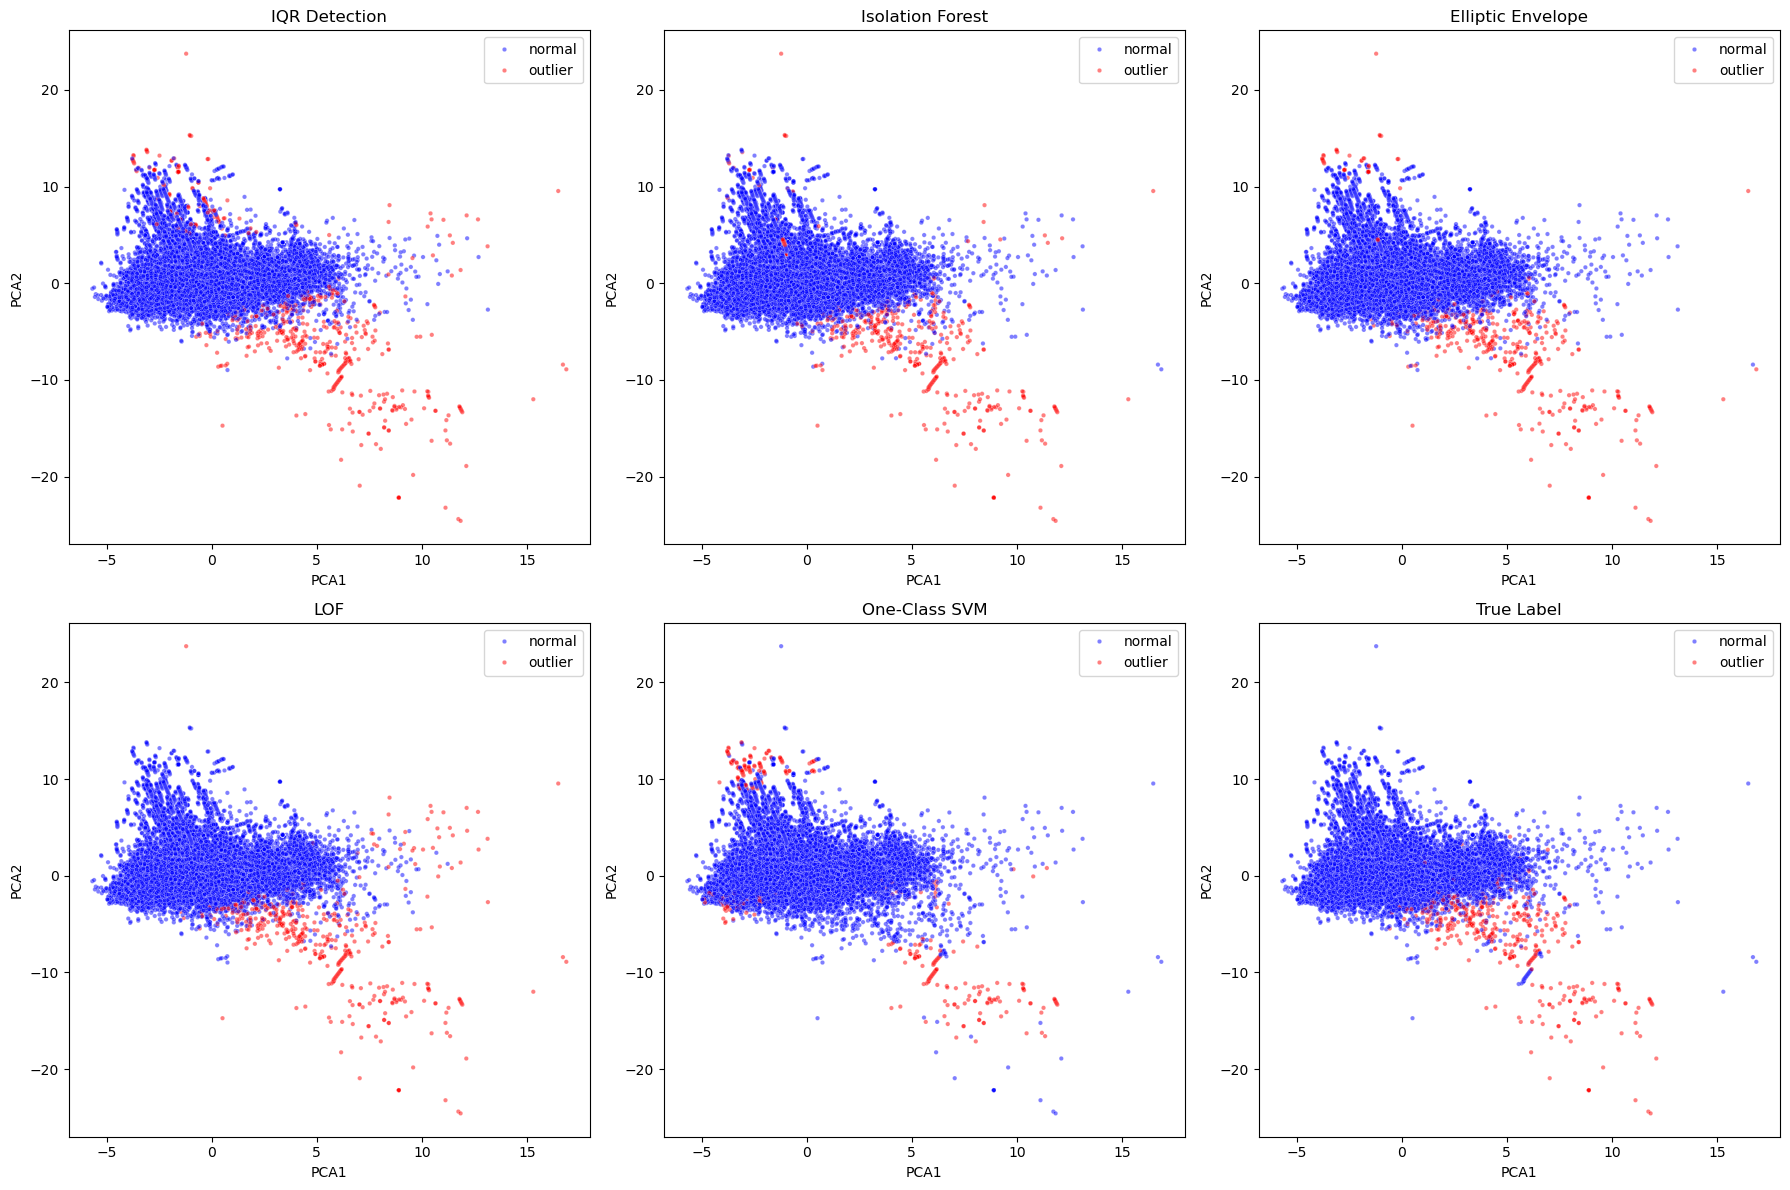

In [130]:
features = ['V14', 'V10', 'V4', 'V12', 'V17', 'V16']
X_features = df_out[features]

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_features)
explained_var = pca.explained_variance_ratio_
print(f"Total variance explained by PC1 and PC2: {explained_var.sum()*100:.2f}%")


df_out['PCA1'] = pca_result[:, 0]
df_out['PCA2'] = pca_result[:, 1]

models = {
    'iqr_anomaly': 'IQR Detection',
    'iso_anomaly': 'Isolation Forest',
    'ell_anomaly': 'Elliptic Envelope',
    'lof_anomaly': 'LOF',
    'svm_anomaly': 'One-Class SVM',
    'true_lable': 'True Label'
}

plt.figure(figsize=(18, 12))

for i, (col, title) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(
        data=df_out,
        x='PCA1',
        y='PCA2',
        hue=df_out[col].map({0: 'normal', 1: 'outlier', 'normal': 'normal', 'outlier': 'outlier'}),
        palette={'normal': 'blue', 'outlier': 'red'},
        alpha=0.5,
        s=10
    )
    plt.title(title)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()
